In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.patches import Rectangle, Circle, Patch
from matplotlib.lines import Line2D

## Load Merged Data

In [2]:
file_path = "/home/nithish/autoware/src/universe/autoware.universe/perception/sim_c_v2i_evaluation/data/merged_objects/merged_objects.csv"
merged_df = pd.read_csv(file_path, names=["obj1_px", "obj1_py", "obj1_pz", "obj1_qx", "obj1_qy", "obj1_qz", "obj1_qw", "obj1_dim_x", "obj1_dim_y", "obj1_dim_z",\
                                              "obj2_px", "obj2_py", "obj2_pz", "obj2_qx", "obj2_qy", "obj2_qz", "obj2_qw", "obj2_dim_x", "obj2_dim_y", "obj2_dim_z"])
merged_df.index.name = "frame_id"

In [3]:
merged_df.head(2)

obj1_px    obj1_py   obj1_pz  obj1_qx  obj1_qy   obj1_qz  \
frame_id                                                               
0        -28.383129 -11.069380  1.258789      0.0     -0.0 -0.756856   
1        -28.354692 -11.085942  1.336914      0.0     -0.0 -0.787643   

           obj1_qw  obj1_dim_x  obj1_dim_y  obj1_dim_z  obj2_px  obj2_py  \
frame_id                                                                   
0        -0.653582    4.343802    1.936040    1.870071      NaN      NaN   
1        -0.616132    4.543383    1.998472    2.008254      NaN      NaN   

          obj2_pz  obj2_qx  obj2_qy  obj2_qz  obj2_qw  obj2_dim_x  obj2_dim_y  \
frame_id                                                                        
0             NaN      NaN      NaN      NaN      NaN         NaN         NaN   
1             NaN      NaN      NaN      NaN      NaN         NaN         NaN   

          obj2_dim_z  
frame_id              
0                NaN  
1                NaN

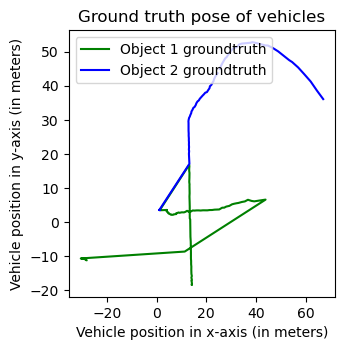

In [4]:
fig = plt.figure() 
fig.set_figwidth(8)
fig.set_figheight(8)
fig.tight_layout(pad=55.0)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = fig.add_subplot(221) 
plt.xlabel("Vehicle position in x-axis (in meters)")
plt.ylabel("Vehicle position in y-axis (in meters)")
plt.title('Ground truth pose of vehicles')
plt.plot(merged_df.iloc[:, 0], merged_df.iloc[:, 1], label='Object 1 groundtruth', color='green')
plt.plot(merged_df.iloc[:, 10], merged_df.iloc[:, 11], label='Object 2 groundtruth', color='blue')
plt.legend(loc='upper left')

In [5]:
columns=["obj2_px", "obj2_py", "obj2_pz", "obj2_qx", "obj2_qy", "obj2_qz", "obj2_qw", "obj2_dim_x", "obj2_dim_y", "obj2_dim_z"]
filtered_merged_df = pd.DataFrame(columns=columns)
filtered_merged_df = merged_df.iloc[56:90, 10:].reset_index(drop=True)
# The drop=True parameter ensures that the old index is not added as a new column in the DataFrame
filtered_merged_df = filtered_merged_df.append(merged_df.iloc[91:137, 10:], ignore_index=True)

dummy_df = pd.DataFrame(columns=columns)
selected_data = merged_df.iloc[137:201, 0:10].reset_index(drop=True)
dummy_df = pd.DataFrame(selected_data.values, columns=columns)
filtered_merged_df = filtered_merged_df.append(dummy_df, ignore_index=True)

In [9]:
filtered_merged_df.head(2)

obj2_px    obj2_py   obj2_pz  obj2_qx  obj2_qy   obj2_qz   obj2_qw  \
0  66.921959  36.064037  0.900989      0.0      0.0 -0.892823  0.450408   
1  64.419432  38.544772  0.900992      0.0      0.0 -0.881132  0.472871   

   obj2_dim_x  obj2_dim_y  obj2_dim_z  
0    4.974713    2.000009    1.799953  
1    4.974713    2.000009    1.799953

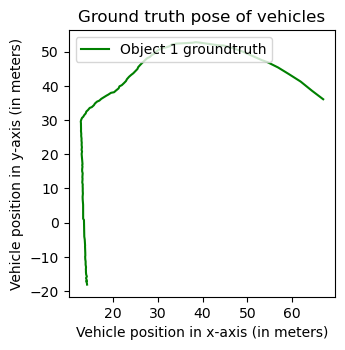

In [10]:
fig = plt.figure() 
fig.set_figwidth(8)
fig.set_figheight(8)
fig.tight_layout(pad=55.0)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = fig.add_subplot(221) 
plt.xlabel("Vehicle position in x-axis (in meters)")
plt.ylabel("Vehicle position in y-axis (in meters)")
plt.title('Ground truth pose of vehicles')
plt.plot(filtered_merged_df.iloc[:, 0], filtered_merged_df.iloc[:, 1], label='Object 1 groundtruth', color='green')
#plt.plot(merged_df.iloc[:, 10], merged_df.iloc[:, 11], label='Object 2 groundtruth', color='blue')
plt.legend(loc='upper left')

## Load Baselink to map TF DATA

In [11]:
file_path = "/home/nithish/autoware/src/universe/autoware.universe/perception/sim_c_v2i_evaluation/data/merged_objects/baselink_to_map_tf.csv"
tf_df = pd.read_csv(file_path, names=["ego_px", "ego_py", "ego_pz", "ego_qx", "ego_qy", "ego_qz", "ego_qw"])
tf_df.index.name = "frame_id"

In [12]:
tf_df.head(2)

ego_px     ego_py    ego_pz    ego_qx    ego_qy    ego_qz  \
frame_id                                                                  
0        -103.860001 -65.000000 -0.001436  0.000000  0.000000  0.707107   
1        -103.860016 -64.978302 -0.001118  0.000386 -0.000379  0.707155   

            ego_qw  
frame_id            
0         0.707107  
1         0.707059

In [13]:
columns=["ego_px", "ego_py", "ego_pz", "ego_qx", "ego_qy", "ego_qz", "ego_qw"]
filtered_tf_df = pd.DataFrame(columns=columns)
filtered_tf_df = tf_df.iloc[56:90, :].reset_index(drop=True)
# The drop=True parameter ensures that the old index is not added as a new column in the DataFrame
filtered_tf_df = filtered_tf_df.append(tf_df.iloc[91:137, :], ignore_index=True)

dummy_df = pd.DataFrame(columns=columns)
selected_data = tf_df.iloc[137:201, :].reset_index(drop=True)
dummy_df = pd.DataFrame(selected_data.values, columns=columns)
filtered_tf_df = filtered_tf_df.append(dummy_df, ignore_index=True)

In [56]:
filtered_tf_df.head(60)

ego_px     ego_py    ego_pz    ego_qx        ego_qy    ego_qz    ego_qw
0  -94.539566 -28.786215 -0.001025 -0.002744 -5.639209e-04  0.199343  0.979926
1  -94.276894 -28.699474 -0.001029 -0.002758 -5.060828e-04  0.187957  0.982173
2  -93.753006 -28.543068 -0.001046 -0.002574 -3.006595e-04  0.166276  0.986076
3  -93.232285 -28.407200 -0.001058 -0.002352 -1.373653e-04  0.146899  0.989149
4  -92.712265 -28.290501 -0.001054 -0.002192 -9.982250e-05  0.128773  0.991672
5  -92.186699 -28.190002 -0.001035 -0.002060 -1.715153e-04  0.111840  0.993724
6  -91.653809 -28.104879 -0.001021 -0.001945 -2.224323e-04  0.095583  0.995420
7  -91.384537 -28.067583 -0.001017 -0.001864 -2.291410e-04  0.087681  0.996147
8  -90.840416 -28.003092 -0.001011 -0.001738 -2.302008e-04  0.073028  0.997328
9  -90.290367 -27.950796 -0.001009 -0.001591 -2.104561e-04  0.059548  0.998224
10 -89.737419 -27.908991 -0.001012 -0.001425 -1.610524e-04  0.047793  0.998856
11 -89.459160 -27.892073 -0.001010 -0.001379 -1.673238e-04  0.042397  0.999100
12 -88.905640 -27.865431 -0.001023 -0.001238 -6.485220e-05  0.032240  0.999479
13 -88.359093 -27.847179 -0.001041 -0.001083  7.196878e-05  0.023331  0.999727
14 -87.820969 -27.835905 -0.001053 -0.000930  1.616851e-04  0.015748  0.999876
15 -87.287285 -27.830557 -0.001048 -0.000805  1.372317e-04  0.009167  0.999958
16 -87.020195 -27.829729 -0.001042 -0.000734  1.039652e-04  0.006072  0.999981
17 -86.483093 -27.831055 -0.001030 -0.000618  2.090569e-05  0.001086  0.999999
18 -85.940636 -27.836037 -0.001015 -0.000519 -7.244666e-05 -0.003279  0.999994
19 -85.393166 -27.843672 -0.001009 -0.000427 -1.116601e-04 -0.006664  0.999978
20 -84.840797 -27.853334 -0.001007 -0.000337 -1.278932e-04 -0.009444  0.999955
21 -84.563667 -27.858747 -0.001007 -0.000302 -1.296827e-04 -0.010341  0.999946
22 -84.013809 -27.870369 -0.001024 -0.000222 -1.219563e-05 -0.012191  0.999926
23 -83.471237 -27.882303 -0.001041 -0.000157  9.772380e-05 -0.013420  0.999910
24 -82.932877 -27.894768 -0.001040 -0.000121  9.526971e-05 -0.014428  0.999896
25 -82.391846 -27.907656 -0.001026 -0.000080 -9.426134e-07 -0.015056  0.999887
26 -82.120575 -27.914125 -0.001025 -0.000061 -8.059823e-06 -0.015404  0.999881
27 -81.572685 -27.927120 -0.001013 -0.000037 -8.777193e-05 -0.015682  0.999877
28 -81.021149 -27.939785 -0.001013 -0.000001 -9.023551e-05 -0.015530  0.999879
29 -80.469200 -27.951967 -0.001021  0.000022 -3.878309e-05 -0.015352  0.999882
30 -79.923515 -27.963285 -0.001040  0.000043  8.836442e-05 -0.014912  0.999889
31 -79.384399 -27.973860 -0.001046  0.000051  1.329699e-04 -0.014569  0.999894
32 -78.845917 -27.983742 -0.001039  0.000061  8.063585e-05 -0.014006  0.999902
33 -78.303497 -27.993086 -0.001024  0.000063 -1.832118e-05 -0.013509  0.999909
34 -77.480820 -28.005878 -0.001009  0.000071 -1.197917e-04 -0.012321  0.999924
35 -76.925903 -28.013657 -0.001004  0.000078 -1.550495e-04 -0.011600  0.999933
36 -76.372932 -28.020599 -0.001021  0.000078 -3.828092e-05 -0.010915  0.999940
37 -75.828545 -28.026707 -0.001043  0.000079  1.049361e-04 -0.010279  0.999947
38 -75.291725 -28.032082 -0.001050  0.000070  1.535247e-04 -0.009772  0.999952
39 -75.023941 -28.034641 -0.001047  0.000064  1.346801e-04 -0.009751  0.999952
40 -74.486137 -28.039293 -0.001035  0.000060  5.351655e-05 -0.009168  0.999958
41 -73.943581 -28.043688 -0.001020  0.000053 -4.565008e-05 -0.008786  0.999961
42 -73.396324 -28.047560 -0.001013  0.000053 -9.216897e-05 -0.008194  0.999966
43 -72.845451 -28.054682 -0.001014 -0.000134 -8.304276e-05 -0.009253  0.999957
44 -72.571533 -28.059135 -0.001021 -0.000157 -3.607040e-05 -0.009790  0.999952
45 -72.033325 -28.069302 -0.001048 -0.000172  1.473545e-04 -0.011416  0.999935
46 -71.508698 -28.080872 -0.001069 -0.000174  2.867212e-04 -0.013035  0.999915
47 -70.999397 -28.093733 -0.001148 -0.000172  4.007579e-04 -0.014856  0.999890
48 -70.495506 -28.108166 -0.001117 -0.000176  3.056432e-04 -0.014697  0.999892
49 -70.245163 -28.115435 -0.001190 -0.000138  2.638225e-0

#### Transform Carom data

In [15]:
def euler_from_quaternion(x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return yaw_z # in radians

In [16]:
def transform_baselink_to_map_frame(x, y, x_tf, y_tf, yaw_angle):
    # to transform the points from the base_link to map frame
    # transform is done for comparison with ground truth points which is in map frame
    x_ = x*math.cos(yaw_angle) - y*math.sin(yaw_angle) + x_tf # x-axis translation between map frame and base_link
    y_ = x*math.sin(yaw_angle) + y*math.cos(yaw_angle) + y_tf # y-axis translation between map frame and base_link
    return x_, y_

In [17]:
columns=["transformed_px", "transformed_py"]
transformed_position_df = pd.DataFrame(columns=columns)
for i in range(len(filtered_merged_df)):
    yaw_tf = euler_from_quaternion(filtered_tf_df.iloc[i, 3], filtered_tf_df.iloc[i, 4], filtered_tf_df.iloc[i, 5], filtered_tf_df.iloc[i, 6])
    transformed_px, transformed_py = \
                transform_baselink_to_map_frame(filtered_merged_df.iloc[i, 0], filtered_merged_df.iloc[i, 1],\
                                                                        filtered_tf_df.iloc[i, 0], filtered_tf_df.iloc[i, 1], yaw_tf)
    transformed_position_dict = dict(zip(columns, [transformed_px, transformed_py]))
    transformed_position_df = transformed_position_df.append(transformed_position_dict, ignore_index=True)

In [60]:
transformed_position_df.head(60)

transformed_px  transformed_py
0       -47.025958       30.557028
1       -48.640431       30.906532
2       -48.813503       30.702150
3       -49.198670       30.374017
4       -49.337421       30.075976
5       -49.547365       29.664464
6       -48.403832       28.641490
7       -49.700873       28.895704
8       -49.823135       28.627423
9       -49.987825       28.269792
10      -50.188292       27.889455
11      -50.264597       27.415134
12      -50.574556       26.877435
13      -50.760583       26.448515
14      -51.007482       26.092440
15      -50.525324       25.426992
16      -51.261401       25.081791
17      -51.418185       24.607340
18      -51.484299       24.259480
19      -51.612984       23.755381
20      -51.220204       23.085597
21      -51.741961       22.665232
22      -51.784339       22.382483
23      -51.867146       21.843156
24      -51.881183       21.202006
25      -51.617720       20.673815
26      -51.925048       20.174094
27      -51.924381       19.534816
28      -51.947442       19.203586
29      -51.938485       18.611273
30      -51.953616       18.000467
31      -51.933635       17.397162
32      -51.941082       16.747673
33      -51.649304       16.200613
34      -51.880915       15.034132
35      -51.885962       14.579826
36      -51.860237       14.090594
37      -51.860458       13.418125
38      -51.598918       12.884401
39      -51.821531       12.253547
40      -51.802931       11.716957
41      -51.799513       11.424212
42      -51.507109       10.829377
43      -51.385284       10.263679
44      -51.595193        9.652077
45      -51.612676        9.418360
46      -51.594512        8.828751
47      -51.331021        8.488220
48      -51.453069        8.000047
49      -51.822433        7.540659
50      -51.766235        7.029093
51      -51.788436        6.738180
52      -51.778270        6.188944
53      -51.562428        5.672189
54      -51.810385        5.132893
55      -51.871779        4.892014
56      -51.900153        4.283668
57      -51.954733        3.828283
58      -51.817643        3.280220
59      -52.005069        2.824803

## Load Groundtruth data

In [19]:
file_path = "/home/nithish/autoware/src/universe/autoware.universe/perception/sim_c_v2i_evaluation/data/merged_objects/ground_truth_objects.csv"
groundtruth_df = pd.read_csv(file_path, names=["obj1_px", "obj1_py", "obj1_pz", "obj1_qx", "obj1_qy", "obj1_qz", "obj1_qw", "obj1_dim_x", "obj1_dim_y", "obj1_dim_z",\
                                              "obj2_px", "obj2_py", "obj2_pz", "obj2_qx", "obj2_qy", "obj2_qz", "obj2_qw", "obj2_dim_x", "obj2_dim_y", "obj2_dim_z"])
groundtruth_df.index.name = "frame_id"

In [20]:
groundtruth_df.head(61)

obj1_px    obj1_py   obj1_pz   obj1_qx   obj1_qy   obj1_qz  \
frame_id                                                                  
0        -110.243683  -0.000402 -0.019672  0.000043 -0.000038 -0.711059   
1        -110.243683  -0.000402 -0.019672  0.000043 -0.000038 -0.711059   
2        -110.243683  -0.000402 -0.019672  0.000043 -0.000038 -0.711059   
3        -110.243683  -0.000402 -0.019672  0.000043 -0.000038 -0.711059   
4        -110.243683  -0.000402 -0.019672  0.000043 -0.000038 -0.711059   
...              ...        ...       ...       ...       ...       ...   
56        -90.156960 -24.476881 -0.021510  0.000978 -0.000265 -0.020449   
57        -89.883759 -24.482470 -0.021519  0.000902 -0.000277 -0.018567   
58        -89.340828 -24.491623 -0.021450  0.000759 -0.000154 -0.015022   
59        -88.802719 -24.498449 -0.021330  0.000616  0.000054 -0.012007   
60        -88.268478 -24.503212 -0.021235  0.000501  0.000218 -0.009406   

           obj1_qw  obj1_dim_x  obj1_dim_y  obj1_dim_z    obj2_px    obj2_py  \
frame_id                                                                       
0         0.703132     5.91519    1.988433    2.560655 -67.206413  58.194321   
1         0.703132     5.91519    1.988433    2.560655 -67.206413  58.194321   
2         0.703132     5.91519    1.988433    2.560655 -67.206413  58.194321   
3         0.703132     5.91519    1.988433    2.560655 -67.206413  58.194321   
4         0.703132     5.91519    1.988433    2.560655 -67.206413  58.194321   
...            ...         ...         ...         ...        ...        ...   
56        0.999790     5.91519    1.988433    2.560655 -52.243225  29.552206   
57        0.999827     5.91519    1.988433    2.560655 -52.245308  29.283972   
58        0.999887     5.91519    1.988433    2.560655 -52.249641  28.725538   
59        0.999928     5.91519    1.988433    2.560655 -52.253983  28.167158   
60        0.999956     5.91519    1.988433    2.560655 -52.258308  27.632128   

           obj2_pz   obj2_qx       obj2_qy   obj2_qz   obj2_qw  obj2_dim_x  \
frame_id                                                                     
0         0.004240 -0.000004 -7.540472e-07 -0.005208  0.999986    4.552699   
1         0.004240 -0.000004 -7.540472e-07 -0.005208  0.999986    4.552699   
2         0.004240 -0.000004 -7.540472e-07 -0.005208  0.999986    4.552699   
3         0.004240 -0.000004 -7.540472e-07 -0.005208  0.999986    4.552699   
4         0.004240 -0.000004 -7.540472e-07 -0.005208  0.999986    4.552699   
...            ...       ...           ...       ...       ...         ...   
56        0.003581 -0.000040 -4.201991e-05 -0.709757  0.704446    4.552699   
57        0.003702  0.000053  5.103235e-05 -0.709804  0.704400    4.552699   
58        0.003942  0.000239  2.345294e-04 -0.709910  0.704292    4.552699   
59        0.003764  0.000101  9.785206e-05 -0.710032  0.704169    4.552699   
60        0.003466 -0.000129 -1.296599e-04 -0.710044  0.704157    4.552699   

          obj2_dim_y  obj2_dim_z  
frame_id                          
0           2.097072    1.767166  
1           2.097072    1.767166  
2           2.097072    1.767166  
3           2.097072    1.767166  
4           2.097072    1.767166  
...              ...         ...  
56          2.097072    1.767166  
57          2.097072    1.767166  
58          2.097072    1.767166  
59          2.097072    1.767166  
60          2.097072    1.767166  

[61 rows x 20 columns]

In [21]:
columns=["obj1_px", "obj1_py", "obj1_pz", "obj1_qx", "obj1_qy", "obj1_qz", "obj1_qw", "obj1_dim_x", "obj1_dim_y", "obj1_dim_z",\
        "obj2_px", "obj2_py", "obj2_pz", "obj2_qx", "obj2_qy", "obj2_qz", "obj2_qw", "obj2_dim_x", "obj2_dim_y", "obj2_dim_z"]
filtered_groundtruth_df = pd.DataFrame(columns=columns)
filtered_groundtruth_df = groundtruth_df.iloc[56:90, :].reset_index(drop=True)
# The drop=True parameter ensures that the old index is not added as a new column in the DataFrame
filtered_groundtruth_df = filtered_groundtruth_df.append(groundtruth_df.iloc[91:137, :], ignore_index=True)

dummy_df = pd.DataFrame(columns=columns)
selected_data = groundtruth_df.iloc[137:201, :].reset_index(drop=True)
dummy_df = pd.DataFrame(selected_data.values, columns=columns)
filtered_groundtruth_df = filtered_groundtruth_df.append(dummy_df, ignore_index=True)

In [22]:
filtered_groundtruth_df

obj1_px    obj1_py   obj1_pz   obj1_qx   obj1_qy   obj1_qz   obj1_qw  \
0   -90.156960 -24.476881 -0.021510  0.000978 -0.000265 -0.020449  0.999790   
1   -89.883759 -24.482470 -0.021519  0.000902 -0.000277 -0.018567  0.999827   
2   -89.340828 -24.491623 -0.021450  0.000759 -0.000154 -0.015022  0.999887   
3   -88.802719 -24.498449 -0.021330  0.000616  0.000054 -0.012007  0.999928   
4   -88.268478 -24.503212 -0.021235  0.000501  0.000218 -0.009406  0.999956   
..         ...        ...       ...       ...       ...       ...       ...   
139 -64.506340 -24.503159 -0.021839  0.000004 -0.000559 -0.001155  0.999999   
140 -64.506340 -24.503159 -0.021839  0.000004 -0.000559 -0.001155  0.999999   
141 -64.506340 -24.503159 -0.021839  0.000004 -0.000559 -0.001155  0.999999   
142 -64.506340 -24.503159 -0.021839  0.000004 -0.000559 -0.001155  0.999999   
143 -64.506340 -24.503159 -0.021839  0.000004 -0.000559 -0.001155  0.999999   

     obj1_dim_x  obj1_dim_y  obj1_dim_z    obj2_px    obj2_py   obj2_pz  \
0       5.91519    1.988433    2.560655 -52.243225  29.552206  0.003581   
1       5.91519    1.988433    2.560655 -52.245308  29.283972  0.003702   
2       5.91519    1.988433    2.560655 -52.249641  28.725538  0.003942   
3       5.91519    1.988433    2.560655 -52.253983  28.167158  0.003764   
4       5.91519    1.988433    2.560655 -52.258308  27.632128  0.003466   
..          ...         ...         ...        ...        ...       ...   
139     5.91519    1.988433    2.560655 -52.175774 -46.407242  0.002789   
140     5.91519    1.988433    2.560655 -52.175156 -46.623943  0.002856   
141     5.91519    1.988433    2.560655 -52.174603 -46.813660  0.002909   
142     5.91519    1.988433    2.560655 -52.174267 -46.978218  0.002944   
143     5.91519    1.988433    2.560655 -52.174412 -47.021442  0.002009   

      obj2_qx   obj2_qy   obj2_qz   obj2_qw  obj2_dim_x  obj2_dim_y  \
0   -0.000040 -0.000042 -0.709757  0.704446    4.552699    2.097072   
1    0.000053  0.000051 -0.709804  0.704400    4.552699    2.097072   
2    0.000239  0.000235 -0.709910  0.704292    4.552699    2.097072   
3    0.000101  0.000098 -0.710032  0.704169    4.552699    2.097072   
4   -0.000129 -0.000130 -0.710044  0.704157    4.552699    2.097072   
..        ...       ...       ...       ...         ...         ...   
139 -0.000524 -0.000525 -0.706125  0.708087    4.552699    2.097072   
140 -0.000476 -0.000477 -0.706127  0.708084    4.552699    2.097072   
141 -0.000435 -0.000436 -0.706130  0.708082    4.552699    2.097072   
142 -0.000407 -0.000408 -0.706023  0.708189    4.552699    2.097072   
143 -0.001125 -0.001129 -0.705709  0.708500    4.552699    2.097072   

     obj2_dim_z  
0      1.767166  
1      1.767166  
2      1.767166  
3      1.767166  
4      1.767166  
..          ...  
139    1.767166  
140    1.767166  
141    1.767166  
142    1.767166  
143    1.767166  

[144 rows x 20 columns]

#### Plot Groundtruth and CAROM detection

In [74]:
fig = plt.figure() 
fig.set_figwidth(8)
fig.set_figheight(8)
fig.tight_layout(pad=55.0)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = fig.add_subplot(221) 
plt.xlabel("Vehicle position in x-axis (in meters)")
plt.ylabel("Vehicle position in y-axis (in meters)")
plt.title('Ground truth pose of vehicles')
plt.plot(filtered_groundtruth_df.iloc[:, 0], filtered_groundtruth_df.iloc[:, 1], label='Object 1 groundtruth', color='green')
plt.plot(filtered_groundtruth_df.iloc[:, 10], filtered_groundtruth_df.iloc[:, 11], label='Object 2 groundtruth', color='blue')
plt.legend(loc='upper left')

ax = fig.add_subplot(222) 
plt.xlabel("Vehicle position in x-axis (in meters)")
plt.ylabel("Vehicle position in y-axis (in meters)")
plt.title('CAROM detection and corresponding groundtruth')
#plt.xlim([-80, -40])
plt.xlim([-53, -46])
plt.ylim([0, 35])
plt.plot(filtered_groundtruth_df.iloc[:, 10], filtered_groundtruth_df.iloc[:, 11], label='Object 2 groundtruth', color='green', marker='o', markersize=3)
plt.plot(transformed_position_df.iloc[:, 0], transformed_position_df.iloc[:, 1], label='CAROM detection', color='red', marker='o', markersize=3)
plt.legend(loc="upper left")

## Finding Intersection Over Union

In [24]:
from shapely.geometry import Polygon
from shapely.affinity import rotate
from matplotlib.patches import Polygon as MplPolygon

In [25]:
def euler_from_quaternion(x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return yaw_z # in radians

In [26]:
def create_rotated_box(center_x, center_y, width, height, angle):
    half_width = width / 2
    half_height = height / 2
    rectangle = Polygon([
        (center_x - half_width, center_y - half_height),
        (center_x + half_width, center_y - half_height),
        (center_x + half_width, center_y + half_height),
        (center_x - half_width, center_y + half_height)
    ])
    rotated_rectangle = rotate(rectangle, angle, origin='center', use_radians=False)
    return rotated_rectangle

In [27]:
def calculate_iou(box1, box2):
    intersection = box1.intersection(box2).area
    union = box1.union(box2).area
    return intersection / union if union > 0 else 0

#### Finding IOU and plotting for a pair of boxes

obj1_rotation:  -92.57792497266506
obj2_rotation:  -90.398681640625
IoU: 0.07014203708696268
Bounding Boxes with IoU = 0.07


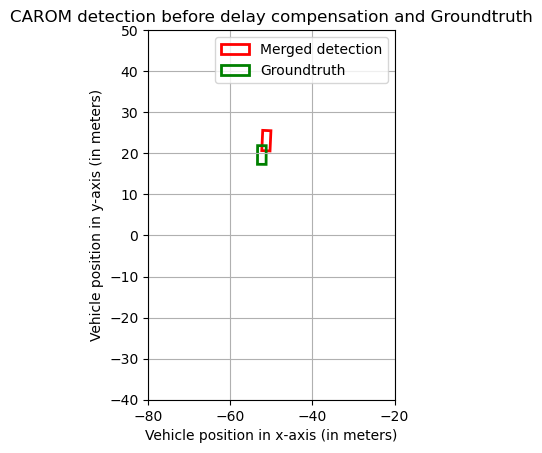

In [28]:
def plot_boxes(box1, box2, iou):
    fig, ax = plt.subplots()
    
    # Convert shapely Polygons to matplotlib Polygons for visualization
    mpl_box1 = MplPolygon(list(box1.exterior.coords), edgecolor='red', facecolor='none', linewidth=2, label='Merged detection')
    mpl_box2 = MplPolygon(list(box2.exterior.coords), edgecolor='green', facecolor='none', linewidth=2, label='Groundtruth')

    ax.add_patch(mpl_box1)
    ax.add_patch(mpl_box2)

    # Plot the boxes
    ax.set_xlim(-80, -20)
    ax.set_ylim(-40, 50)
    ax.set_aspect('equal', 'box')
    plt.legend()
    print(f"Bounding Boxes with IoU = {iou:.2f}")
    plt.title("CAROM detection before delay compensation and Groundtruth")
    plt.xlabel("Vehicle position in x-axis (in meters)")
    plt.ylabel("Vehicle position in y-axis (in meters)")
    plt.grid(True)
    plt.show()

# Example parameters for two rotated boxes
frame_id = 20
obj1_rotation = euler_from_quaternion(filtered_merged_df.iloc[frame_id, 3], filtered_merged_df.iloc[frame_id, 4], filtered_merged_df.iloc[frame_id, 5], filtered_merged_df.iloc[frame_id, 6])
yaw_tf = euler_from_quaternion(filtered_tf_df.iloc[frame_id, 3], filtered_tf_df.iloc[frame_id, 4], filtered_tf_df.iloc[frame_id, 5], filtered_tf_df.iloc[frame_id, 6])
print("obj1_rotation: ", np.rad2deg(obj1_rotation)+np.rad2deg(yaw_tf))
center_x1, center_y1, width1, height1, angle1 = transformed_position_df.iloc[frame_id, 0], transformed_position_df.iloc[frame_id, 1],\
                        filtered_merged_df.iloc[frame_id, 7], filtered_merged_df.iloc[frame_id, 8], np.rad2deg(obj1_rotation)+np.rad2deg(yaw_tf)
obj2_rotation = euler_from_quaternion(filtered_groundtruth_df.iloc[frame_id, 13], filtered_groundtruth_df.iloc[frame_id, 14], filtered_groundtruth_df.iloc[frame_id, 15], filtered_groundtruth_df.iloc[frame_id, 16])
print("obj2_rotation: ", np.rad2deg(obj2_rotation))
center_x2, center_y2, width2, height2, angle2 = filtered_groundtruth_df.iloc[frame_id, 10], filtered_groundtruth_df.iloc[frame_id, 11],\
                        filtered_groundtruth_df.iloc[frame_id, 17], filtered_groundtruth_df.iloc[frame_id, 18], np.rad2deg(obj2_rotation)

# Create the rotated boxes
box1 = create_rotated_box(center_x1, center_y1, width1, height1, angle1)
box2 = create_rotated_box(center_x2, center_y2, width2, height2, angle2)

# Calculate IoU
iou = calculate_iou(box1, box2)
print("IoU:", iou)

# Visualize the boxes
plot_boxes(box1, box2, iou)

Frame Id:  0
obj1_rotation:  -103.46314716984918
obj2_rotation:  -90.43031311035156
IoU: 0.0


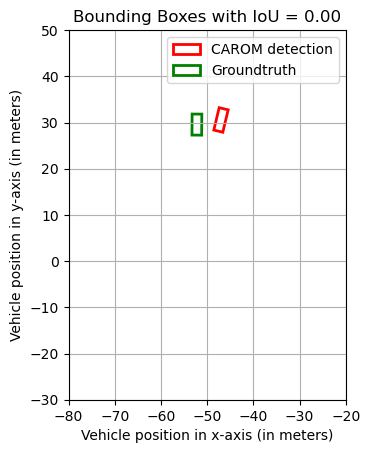

Frame Id:  1
obj1_rotation:  -101.891104744916
obj2_rotation:  -90.43789672851562
IoU: 0.0


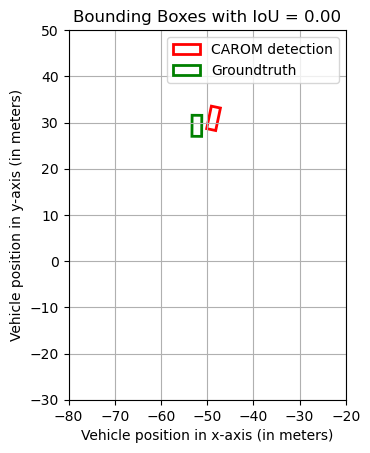

Frame Id:  2
obj1_rotation:  -99.83352432035005
obj2_rotation:  -90.45525360107425
IoU: 0.0


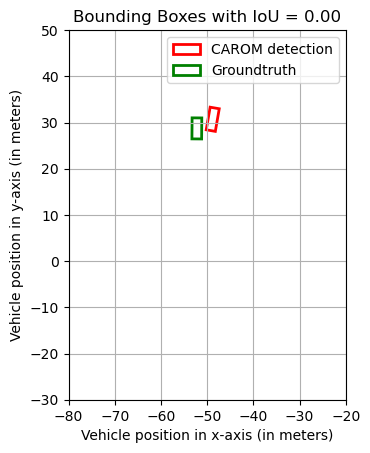

Frame Id:  3
obj1_rotation:  -99.21462941197193
obj2_rotation:  -90.47503662109374
IoU: 0.0


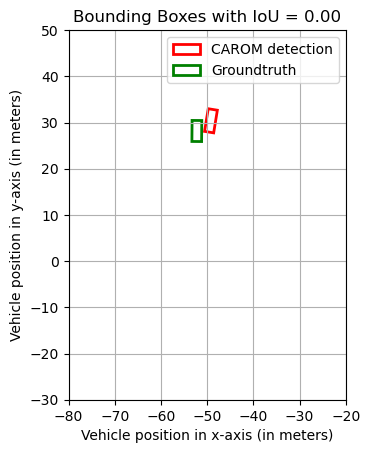

Frame Id:  4
obj1_rotation:  -97.55688806022829
obj2_rotation:  -90.4770278930664
IoU: 0.0


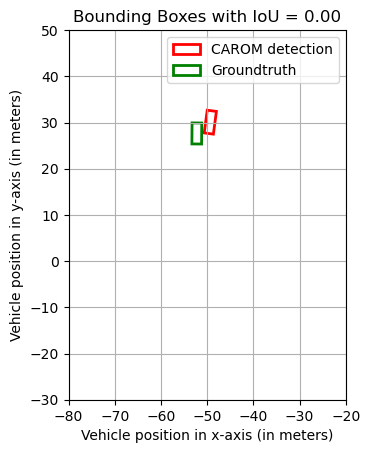

Frame Id:  5
obj1_rotation:  -97.09224119042851
obj2_rotation:  -90.47487640380858
IoU: 0.0


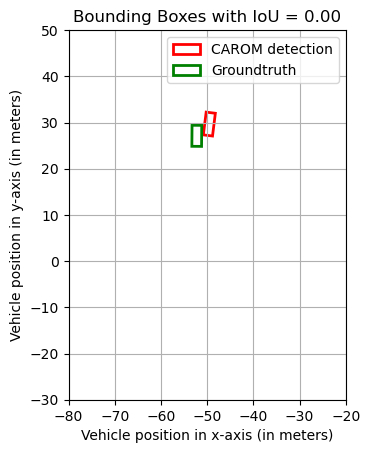

Frame Id:  6
obj1_rotation:  -96.74243583749467
obj2_rotation:  -90.47271728515625
IoU: 0.0


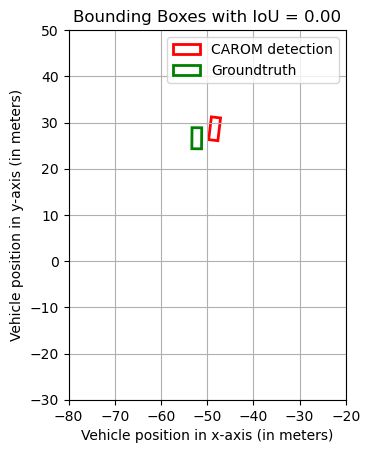

Frame Id:  7
obj1_rotation:  -95.46454114163642
obj2_rotation:  -90.47086334228514
IoU: 0.0


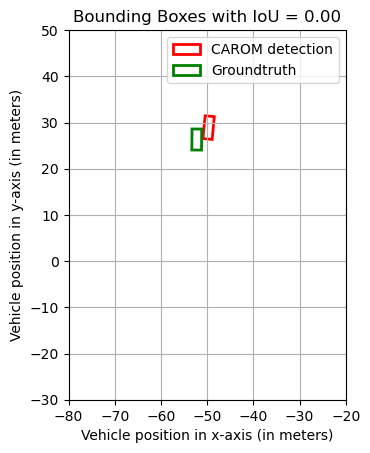

Frame Id:  8
obj1_rotation:  -94.53817387683803
obj2_rotation:  -90.46721649169922
IoU: 0.0


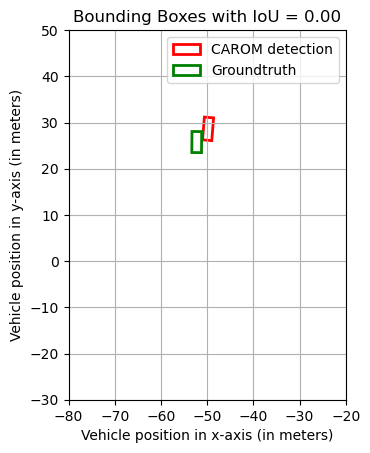

Frame Id:  9
obj1_rotation:  -94.13958024273252
obj2_rotation:  -90.46401977539061
IoU: 0.0


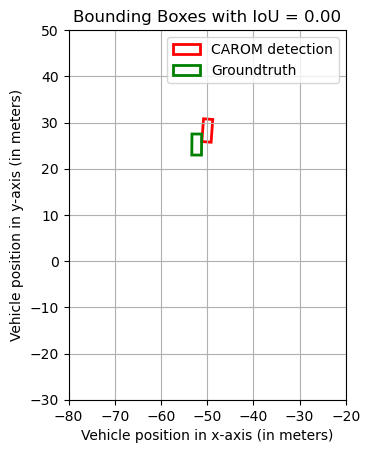

Frame Id:  10
obj1_rotation:  -93.27245063439895
obj2_rotation:  -90.46135711669923
IoU: 0.004952450090245259


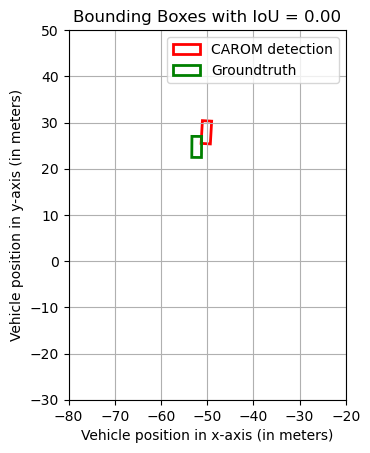

Frame Id:  11
obj1_rotation:  -92.9563524006794
obj2_rotation:  -90.46010589599608
IoU: 0.011002347569155078


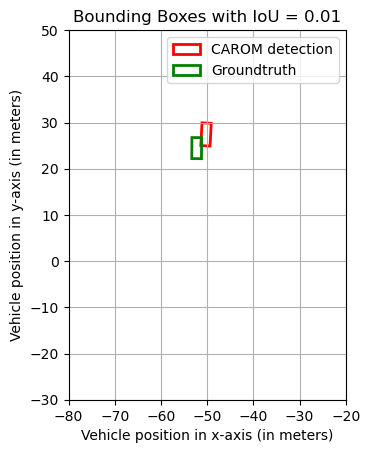

Frame Id:  12
obj1_rotation:  -94.7950486187133
obj2_rotation:  -90.45773315429688
IoU: 0.04448992157389522


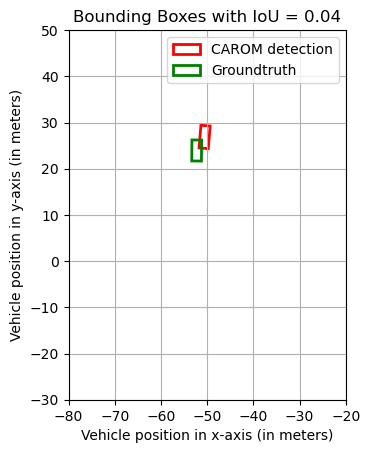

Frame Id:  13
obj1_rotation:  -94.35053635255105
obj2_rotation:  -90.45416259765625
IoU: 0.057766392187335036


Frame Id:  14
obj1_rotation:  -94.9691715903012
obj2_rotation:  -90.45233917236328
IoU: 0.07284280273890487


Frame Id:  15
obj1_rotation:  -94.96096864935657
obj2_rotation:  -90.44860076904298
IoU: 0.03361178896205657


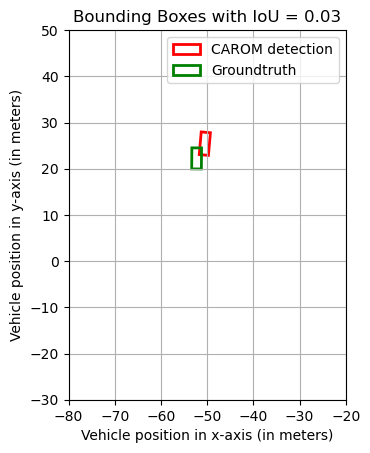

Frame Id:  16
obj1_rotation:  -94.33671586418481
obj2_rotation:  -90.44517517089842
IoU: 0.09969134975672272


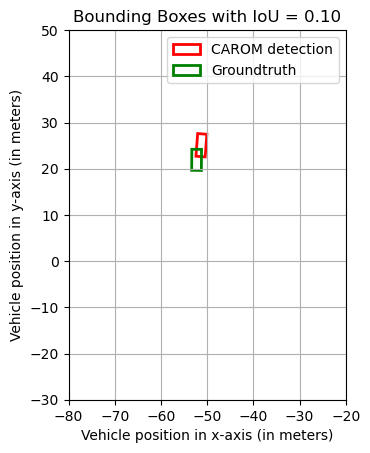

Frame Id:  17
obj1_rotation:  -93.90691792894894
obj2_rotation:  -90.43642425537112
IoU: 0.10292647905490049


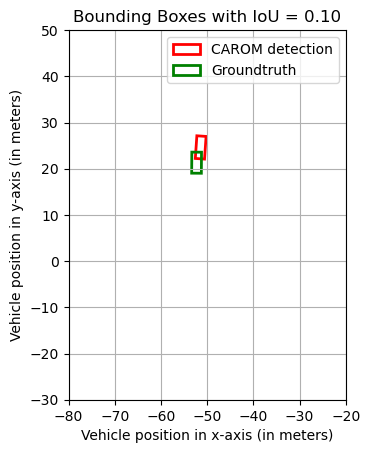

Frame Id:  18
obj1_rotation:  -93.40555427629394
obj2_rotation:  -90.42663574218749
IoU: 0.08748491526062675


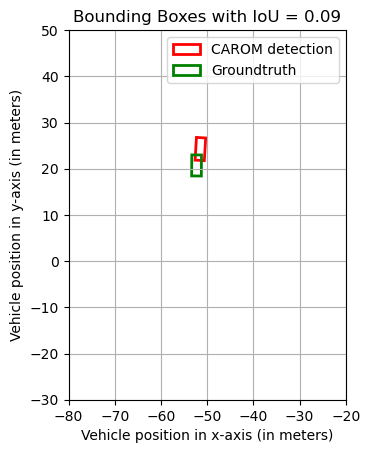

Frame Id:  19
obj1_rotation:  -93.01132404603284
obj2_rotation:  -90.4130096435547
IoU: 0.09000850560954225


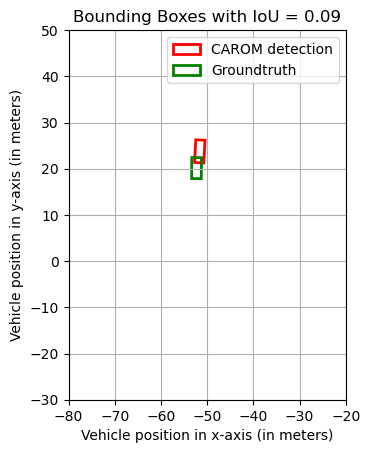

Frame Id:  20
obj1_rotation:  -92.57792497266506
obj2_rotation:  -90.398681640625
IoU: 0.07014203708696268


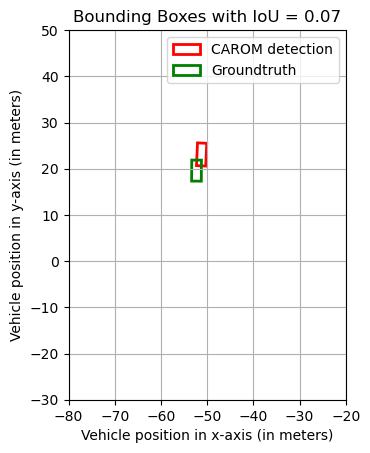

Frame Id:  21
obj1_rotation:  -92.0564891393023
obj2_rotation:  -90.3893356323242
IoU: 0.1243547144813062


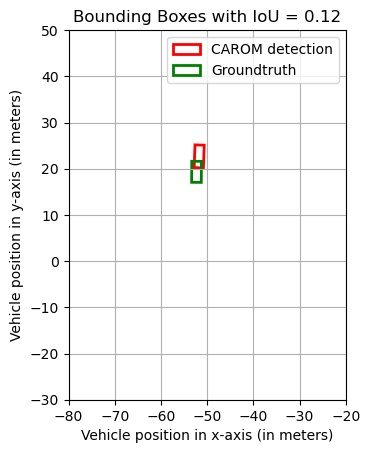

Frame Id:  22
obj1_rotation:  -91.5005438776149
obj2_rotation:  -90.37100219726561
IoU: 0.10335588984147552


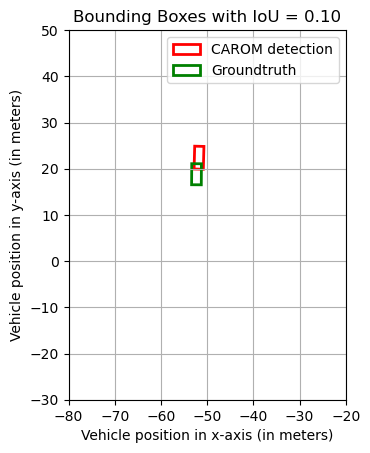

Frame Id:  23
obj1_rotation:  -91.17910312871942
obj2_rotation:  -90.35672760009767
IoU: 0.11631903603202799


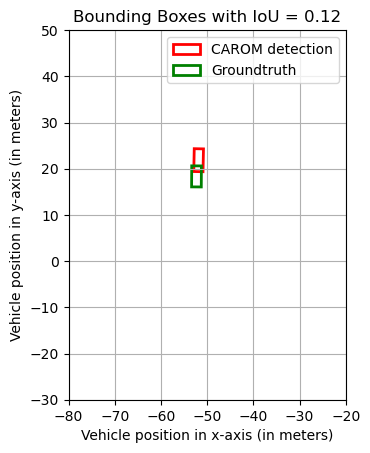

Frame Id:  24
obj1_rotation:  -90.51611582920627
obj2_rotation:  -90.3409881591797
IoU: 0.13772768314305148


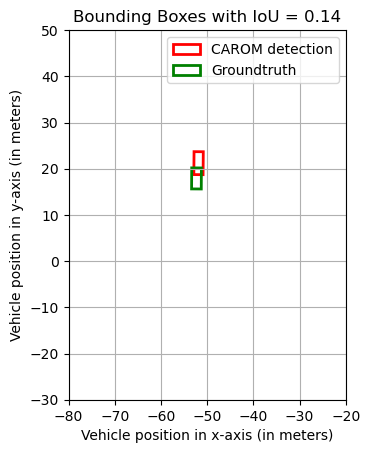

Frame Id:  25
obj1_rotation:  -90.29405653886363
obj2_rotation:  -90.31912994384767
IoU: 0.11650712169156965


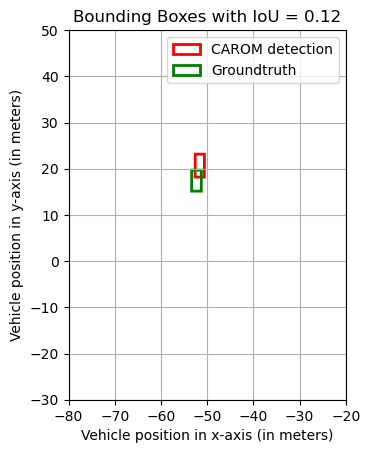

Frame Id:  26
obj1_rotation:  -89.68251483403115
obj2_rotation:  -90.3033905029297
IoU: 0.17358565552702418


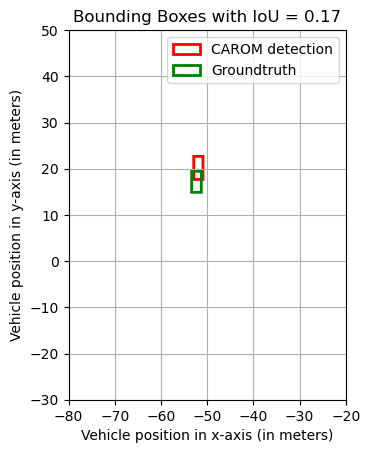

Frame Id:  27
obj1_rotation:  -89.44237683176974
obj2_rotation:  -90.27073669433592
IoU: 0.18503168299097306


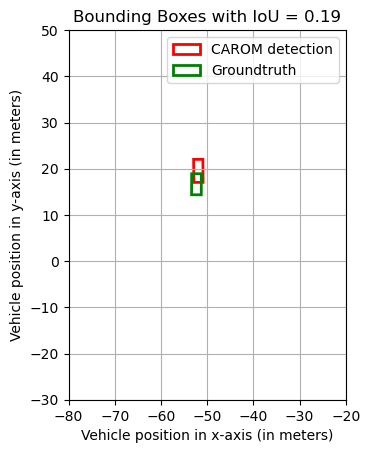

Frame Id:  28
obj1_rotation:  -89.04207729306604
obj2_rotation:  -90.2305374145508
IoU: 0.16240012675521154


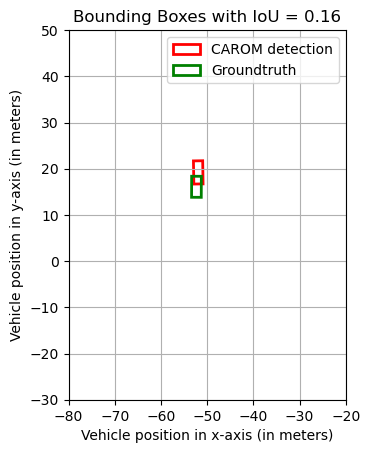

Frame Id:  29
obj1_rotation:  -88.8393906857873
obj2_rotation:  -90.17808532714845
IoU: 0.16406469968335544


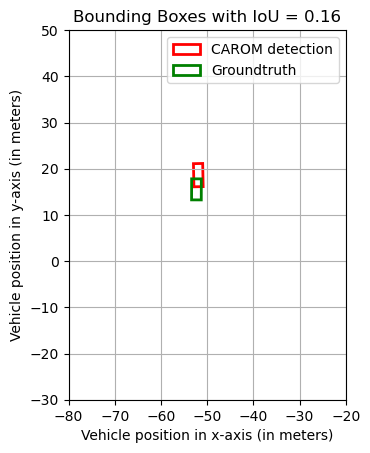

Frame Id:  30
obj1_rotation:  -88.40470603109237
obj2_rotation:  -90.12904357910159
IoU: 0.17297273523000245


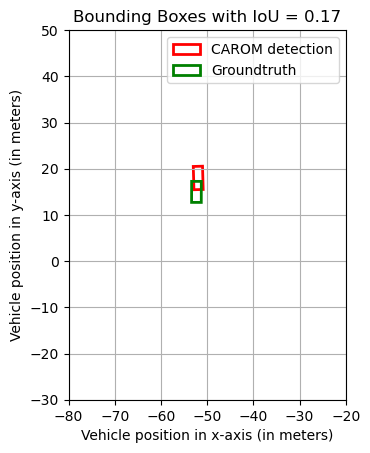

Frame Id:  31
obj1_rotation:  -88.2344849196094
obj2_rotation:  -90.09652709960935
IoU: 0.17950913789984138


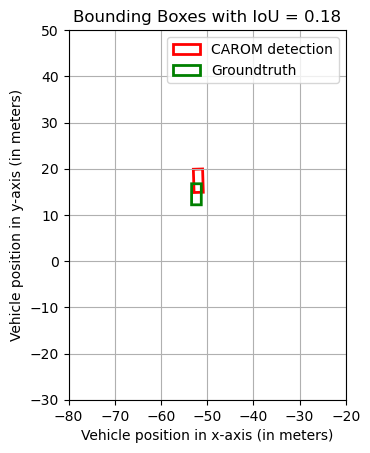

Frame Id:  32
obj1_rotation:  -87.88548317235453
obj2_rotation:  -90.06663513183597
IoU: 0.19603312279276075


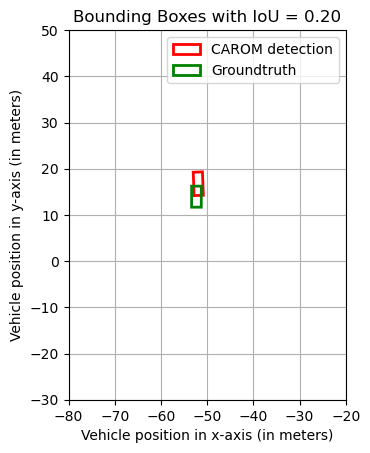

Frame Id:  33
obj1_rotation:  -87.66246621586212
obj2_rotation:  -90.03652191162108
IoU: 0.15477580505012714


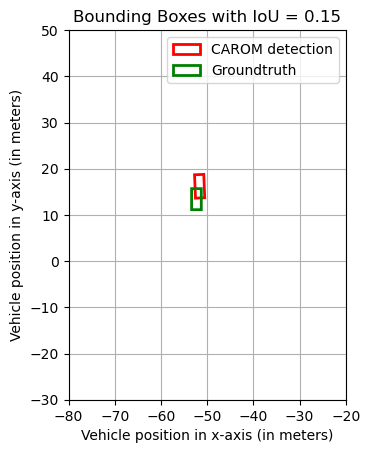

Frame Id:  34
obj1_rotation:  -87.22717064165931
obj2_rotation:  -89.99629211425781
IoU: 0.2285586232978541


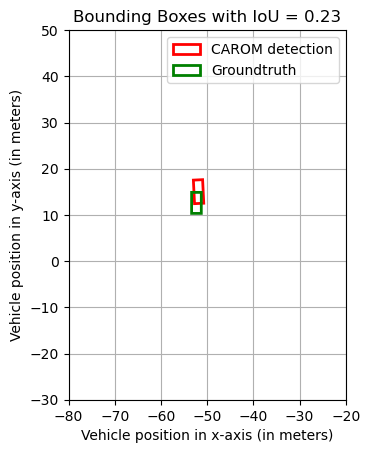

Frame Id:  35
obj1_rotation:  -87.21388608651793
obj2_rotation:  -89.9737777709961
IoU: 0.22209281816121873


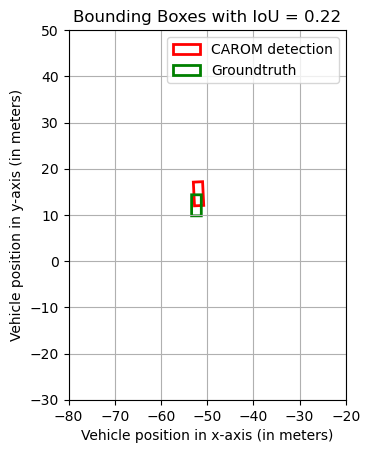

Frame Id:  36
obj1_rotation:  -87.00415690441282
obj2_rotation:  -89.95501708984374
IoU: 0.21280902072139327


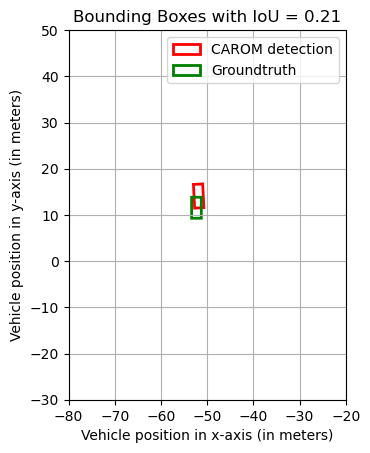

Frame Id:  37
obj1_rotation:  -86.93320063856704
obj2_rotation:  -89.93750000000001
IoU: 0.22862874032043679


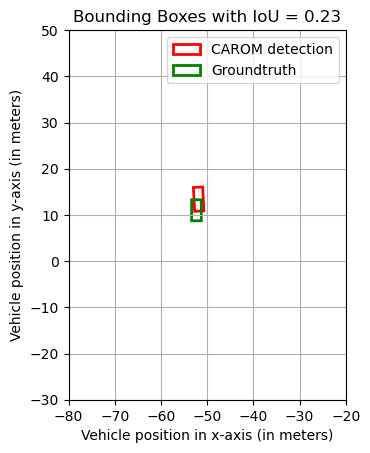

Frame Id:  38
obj1_rotation:  -86.63769900151436
obj2_rotation:  -89.96343231201172
IoU: 0.1781920824082823


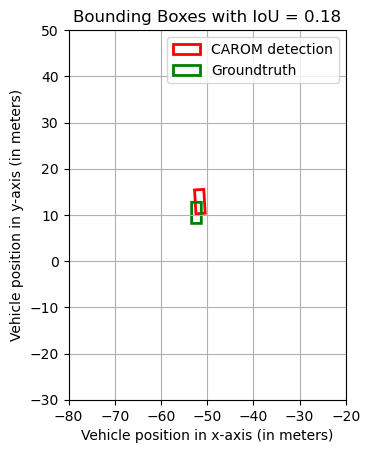

Frame Id:  39
obj1_rotation:  -86.8438280778574
obj2_rotation:  -89.95828247070315
IoU: 0.2598702436034559


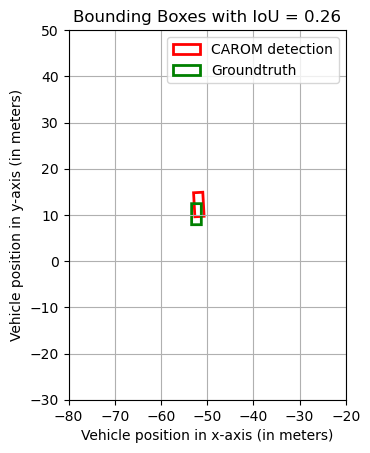

Frame Id:  40
obj1_rotation:  -86.64093297720756
obj2_rotation:  -89.94155120849611
IoU: 0.2545935508689297


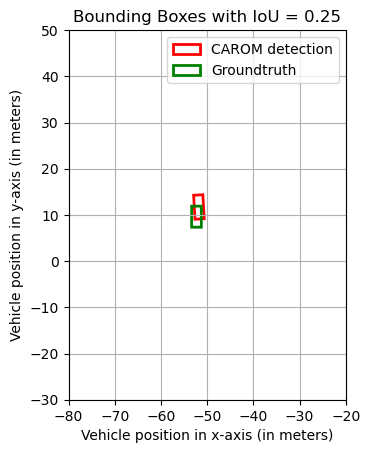

Frame Id:  41
obj1_rotation:  -86.78586747630146
obj2_rotation:  -89.92485809326172
IoU: 0.22929051636618122


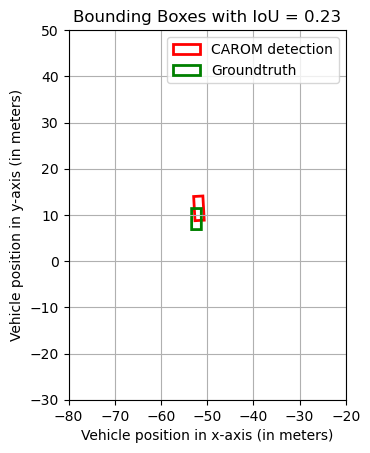

Frame Id:  42
obj1_rotation:  -86.58581112829465
obj2_rotation:  -89.91016387939452
IoU: 0.18171633883504326


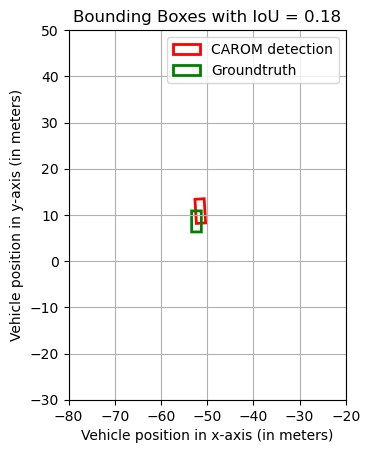

Frame Id:  43
obj1_rotation:  -86.85050190925261
obj2_rotation:  -89.89789581298828
IoU: 0.16416718004457032


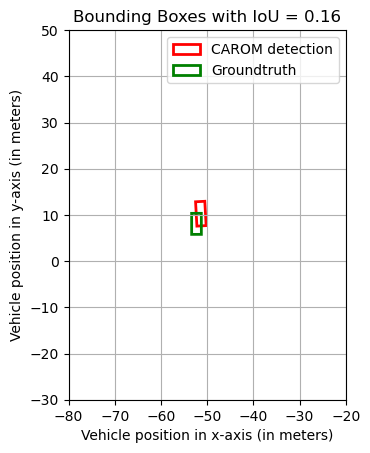

Frame Id:  44
obj1_rotation:  -86.7597814959462
obj2_rotation:  -89.88916778564452
IoU: 0.23705825640860834


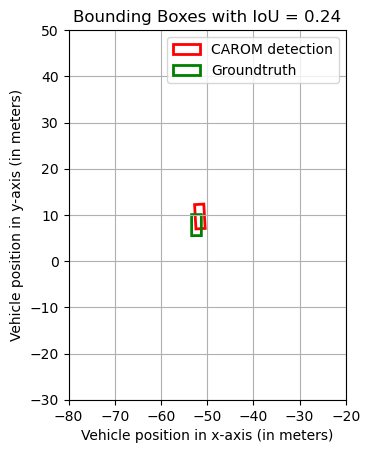

Frame Id:  45
obj1_rotation:  -86.93870743190384
obj2_rotation:  -89.918571472168
IoU: 0.20975232429230473


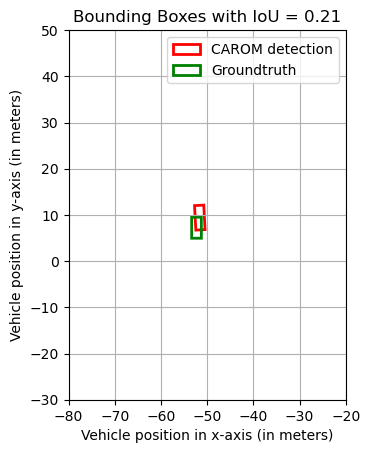

Frame Id:  46
obj1_rotation:  -86.82498918467986
obj2_rotation:  -89.92312622070312
IoU: 0.20890280566940572


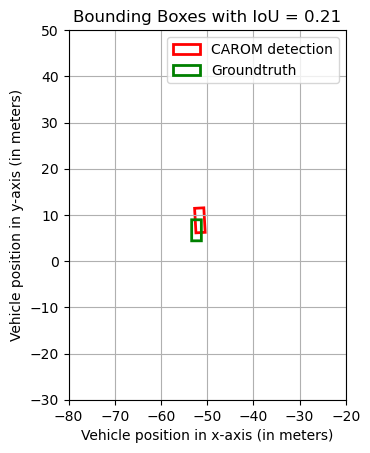

Frame Id:  47
obj1_rotation:  -88.33507839351316
obj2_rotation:  -89.9109344482422
IoU: 0.1507800925622423


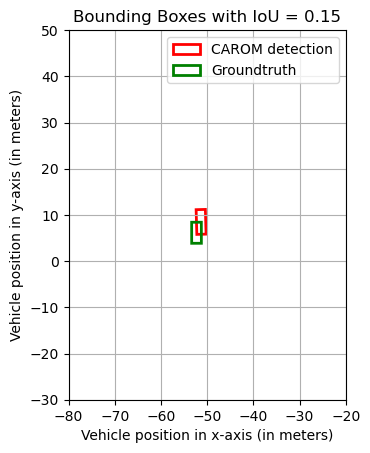

Frame Id:  48
obj1_rotation:  -87.93362002168887
obj2_rotation:  -89.89757537841798
IoU: 0.1689974158042226


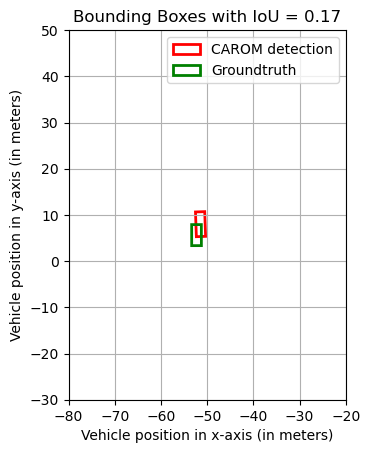

Frame Id:  49
obj1_rotation:  -88.15417027388263
obj2_rotation:  -89.8913803100586
IoU: 0.26336769318828396


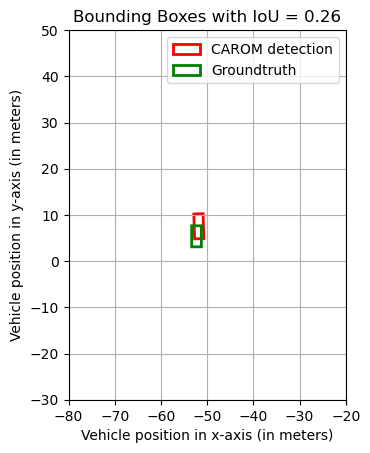

Frame Id:  50
obj1_rotation:  -88.03425703062305
obj2_rotation:  -89.88031768798824
IoU: 0.25054453154842315


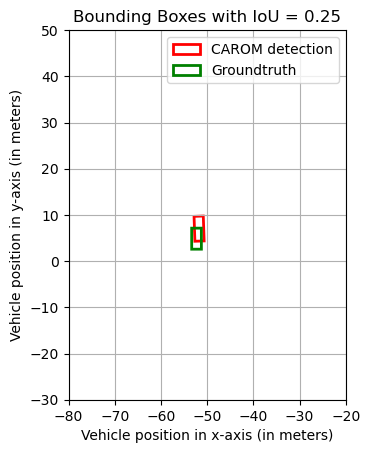

Frame Id:  51
obj1_rotation:  -88.43799968162435
obj2_rotation:  -89.85800170898439
IoU: 0.23047201252594618


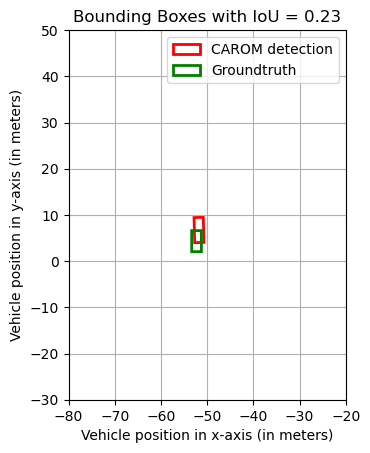

Frame Id:  52
obj1_rotation:  -88.24019324010872
obj2_rotation:  -89.85877990722659
IoU: 0.2266536920955628


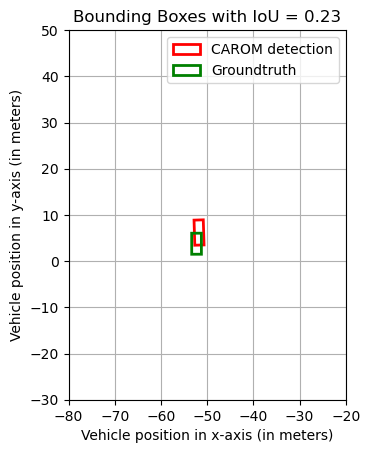

Frame Id:  53
obj1_rotation:  -88.55082539610724
obj2_rotation:  -89.84018707275389
IoU: 0.1858442412290883


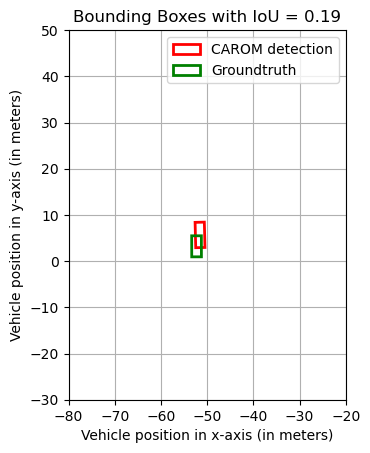

Frame Id:  54
obj1_rotation:  -88.35623959342892
obj2_rotation:  -89.8359603881836
IoU: 0.2611946347262474


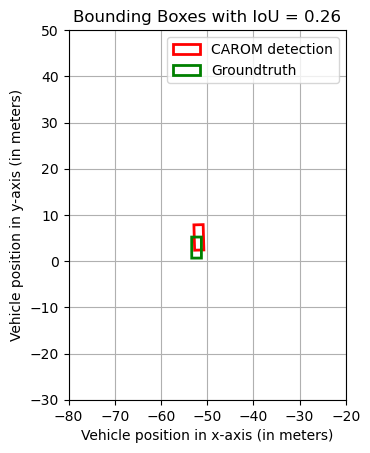

Frame Id:  55
obj1_rotation:  -88.7141996232213
obj2_rotation:  -89.83034515380858
IoU: 0.2432488997086807


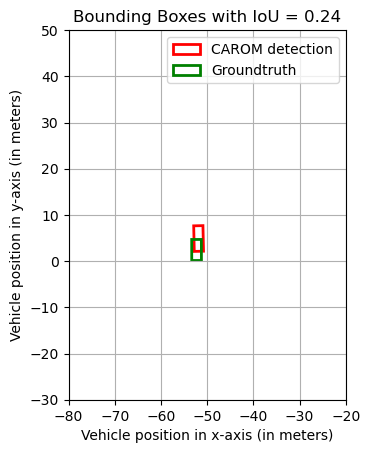

Frame Id:  56
obj1_rotation:  -88.50201769968828
obj2_rotation:  -89.82656860351562
IoU: 0.26035683849028574


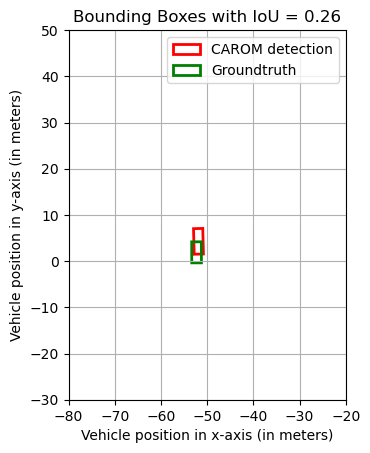

Frame Id:  57
obj1_rotation:  -88.80282067966284
obj2_rotation:  -89.82424926757815
IoU: 0.2661225106019183


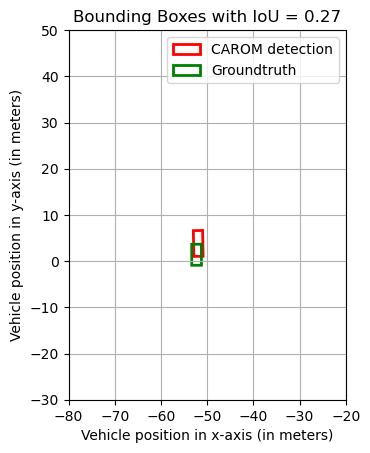

Frame Id:  58
obj1_rotation:  -88.58897047252104
obj2_rotation:  -89.82554626464842
IoU: 0.2391194603738744


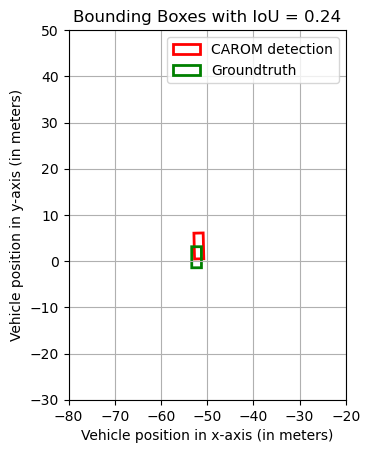

Frame Id:  59
obj1_rotation:  -88.83697704124697
obj2_rotation:  -89.82648468017577
IoU: 0.30492089685645096


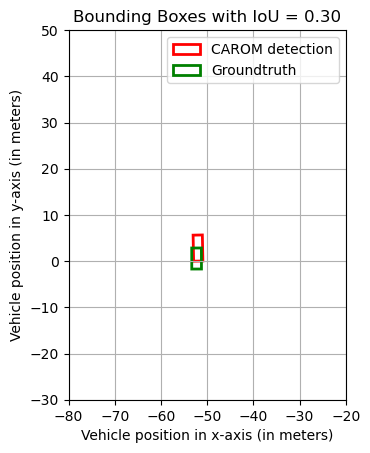

Frame Id:  60
obj1_rotation:  -88.6196249811489
obj2_rotation:  -89.8285903930664
IoU: 0.3025903510854676


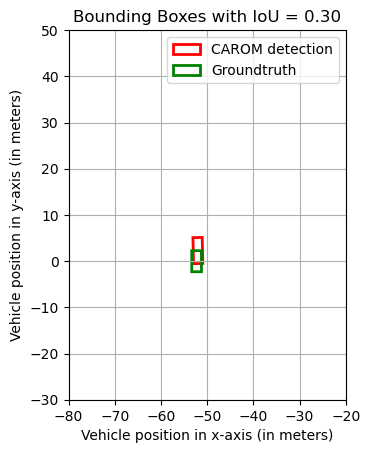

Frame Id:  61
obj1_rotation:  -88.87642670291598
obj2_rotation:  -89.8307418823242
IoU: 0.2575734478946667


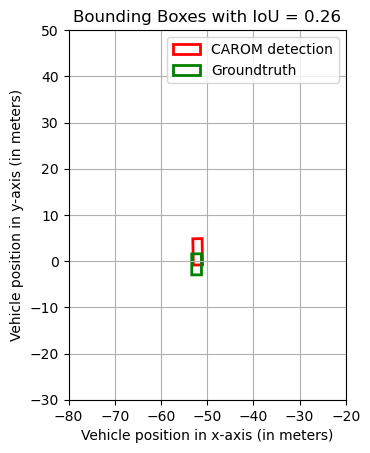

Frame Id:  62
obj1_rotation:  -88.6602563541175
obj2_rotation:  -89.83270263671875
IoU: 0.24294717882857092


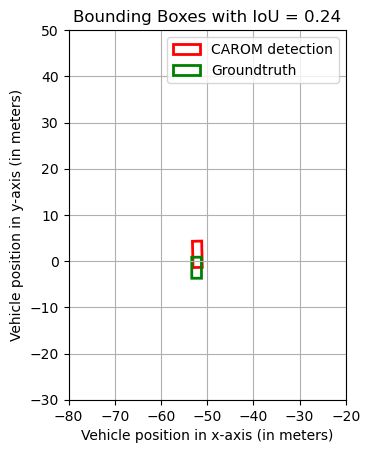

Frame Id:  63
obj1_rotation:  -87.68306749752651
obj2_rotation:  -89.83411407470702
IoU: 0.22755100742542664


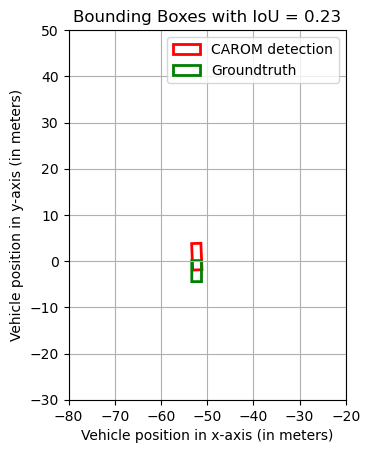

Frame Id:  64
obj1_rotation:  -87.36540915542211
obj2_rotation:  -89.83512878417969
IoU: 0.1998221253117885


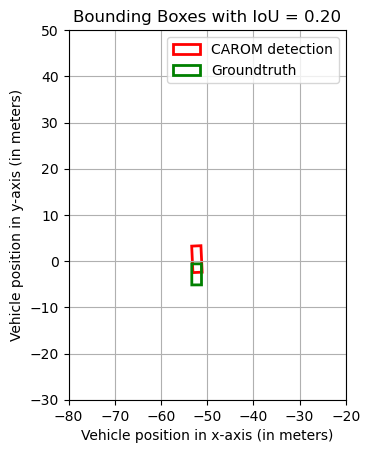

Frame Id:  65
obj1_rotation:  -89.41965801669552
obj2_rotation:  -89.8355484008789
IoU: 0.26188106585382365


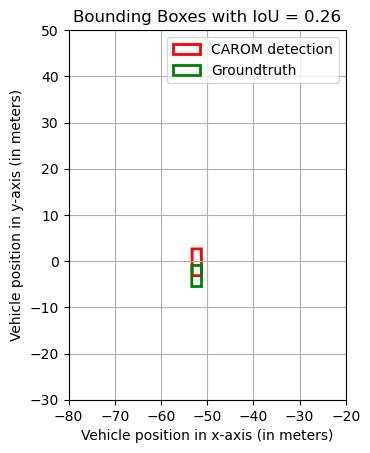

Frame Id:  66
obj1_rotation:  -90.59837972298297
obj2_rotation:  -89.83621215820312
IoU: 0.2388840911562322


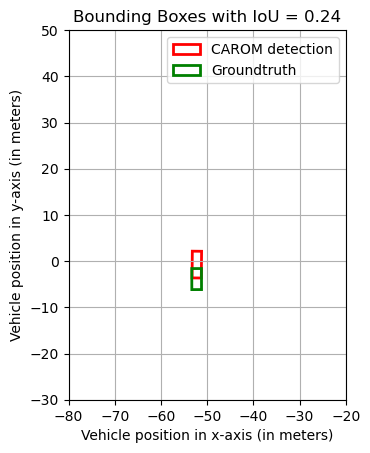

Frame Id:  67
obj1_rotation:  -91.40391595700703
obj2_rotation:  -89.83676147460936
IoU: 0.21864407053097332


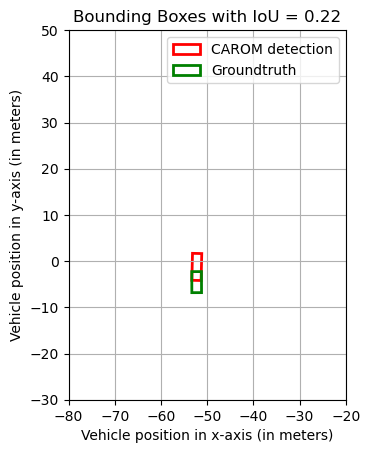

Frame Id:  68
obj1_rotation:  -94.57360406520489
obj2_rotation:  -89.83701324462892
IoU: 0.20342388080326307


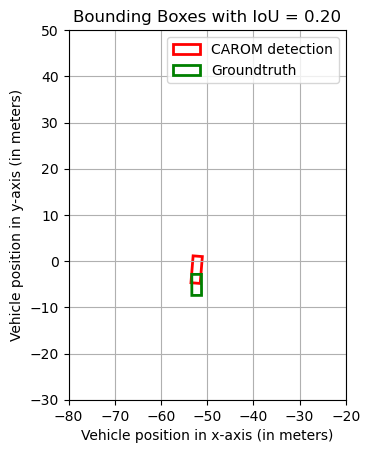

Frame Id:  69
obj1_rotation:  -92.10575459825462
obj2_rotation:  -89.83720397949219
IoU: 0.2545275720368704


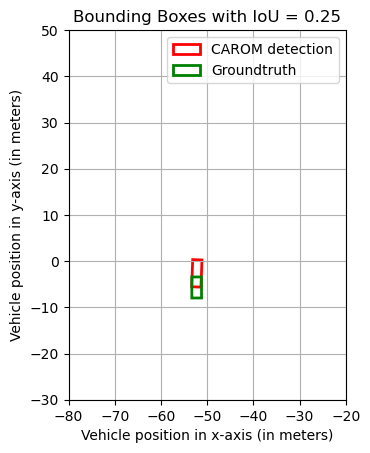

Frame Id:  70
obj1_rotation:  -94.13097759105545
obj2_rotation:  -89.83751678466798
IoU: 0.25264956273699063


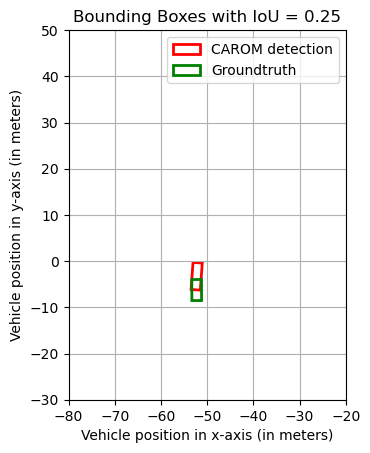

Frame Id:  71
obj1_rotation:  -91.1066339703889
obj2_rotation:  -89.83765411376952
IoU: 0.34408351817526484


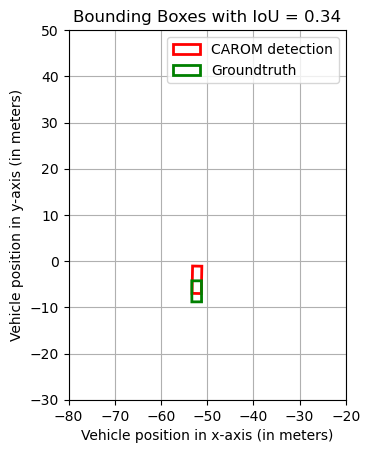

Frame Id:  72
obj1_rotation:  -93.94003501318157
obj2_rotation:  -89.84299468994138
IoU: 0.3454900889830206


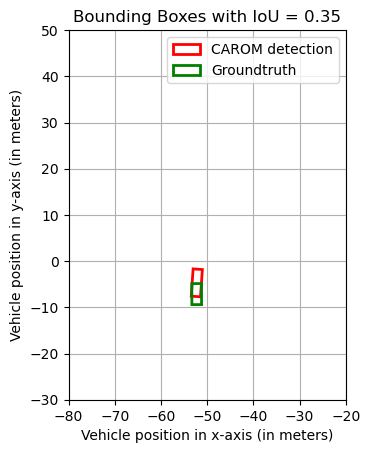

Frame Id:  73
obj1_rotation:  -92.09197721735565
obj2_rotation:  -89.84346008300781
IoU: 0.33378454940312235


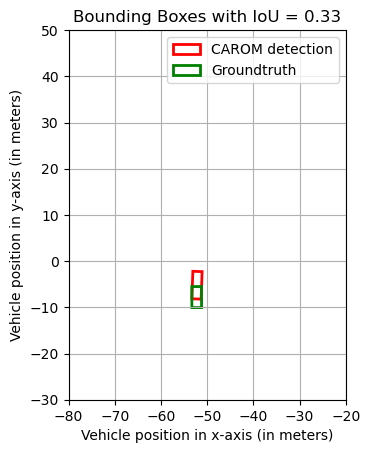

Frame Id:  74
obj1_rotation:  -95.37819337792892
obj2_rotation:  -89.86421966552736
IoU: 0.31580981584203405


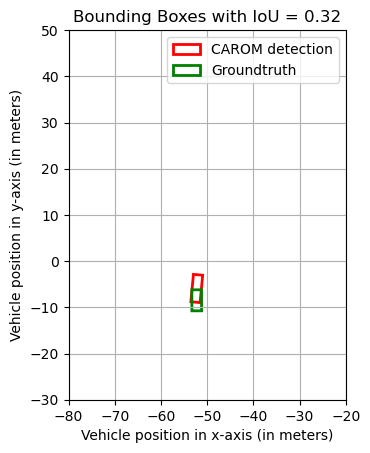

Frame Id:  75
obj1_rotation:  -93.94585058456988
obj2_rotation:  -89.87870025634766
IoU: 0.3234996204458694


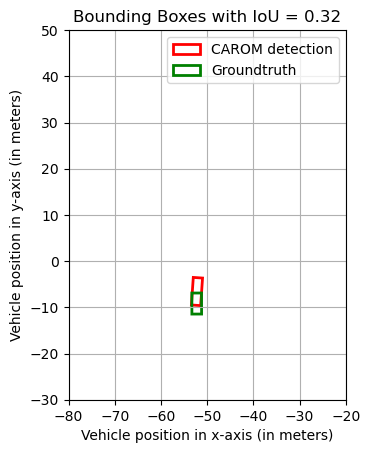

Frame Id:  76
obj1_rotation:  -98.56782383134139
obj2_rotation:  -89.86624145507812
IoU: 0.35295558363007634


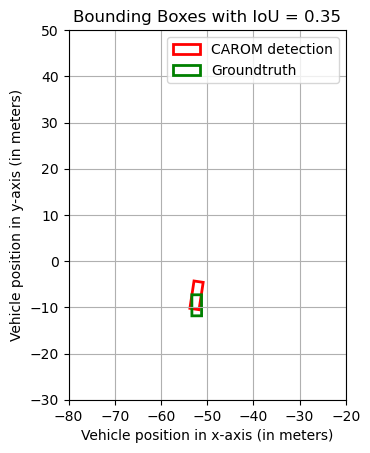

Frame Id:  77
obj1_rotation:  -95.6893870362537
obj2_rotation:  -89.85090637207033
IoU: 0.31877833326660415


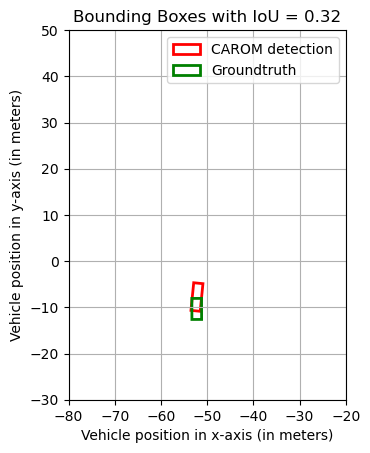

Frame Id:  78
obj1_rotation:  -100.01340988790352
obj2_rotation:  -89.84516906738281
IoU: 0.27431976931298013


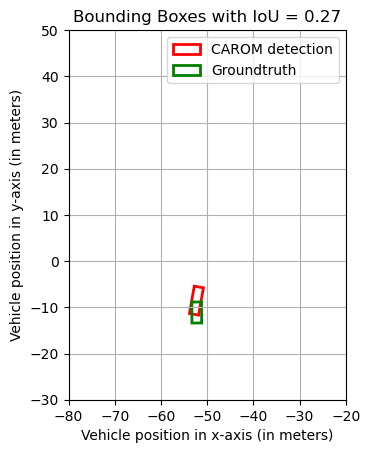

Frame Id:  79
obj1_rotation:  -88.56183975399007
obj2_rotation:  -89.84247589111328
IoU: 0.7352887028318984


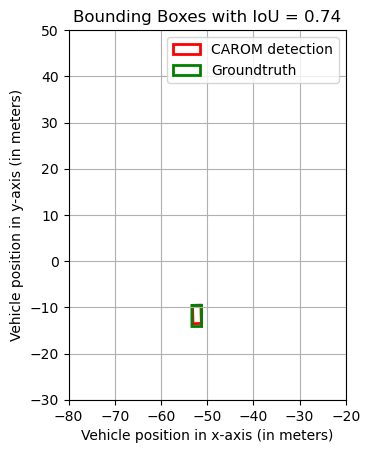

Frame Id:  80
obj1_rotation:  -88.39907634606867
obj2_rotation:  -89.84090423583983
IoU: 0.6817141515974449


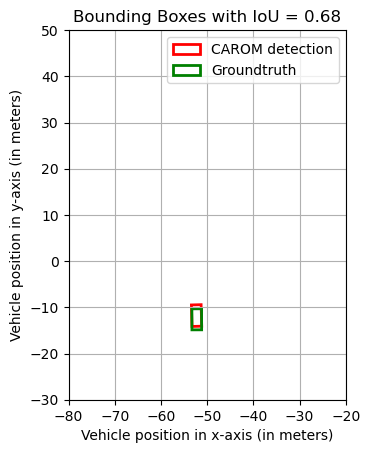

Frame Id:  81
obj1_rotation:  -87.852353853955
obj2_rotation:  -89.83992004394533
IoU: 0.6072226196583392


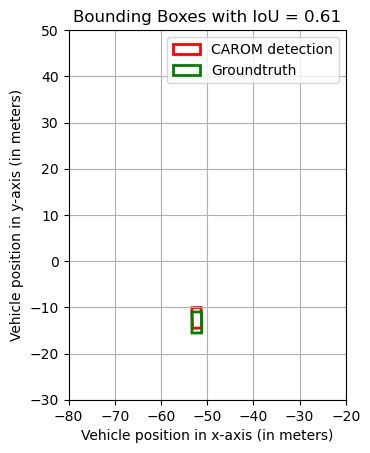

Frame Id:  82
obj1_rotation:  -91.48376052997568
obj2_rotation:  -89.83954620361327
IoU: 0.6919474252641904


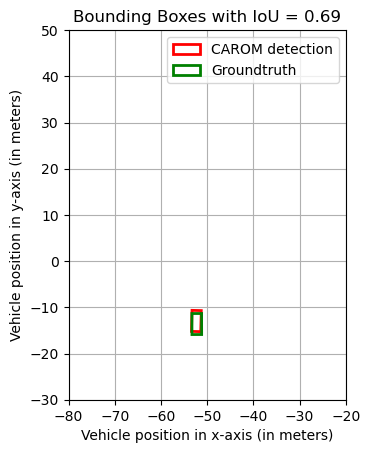

Frame Id:  83
obj1_rotation:  -90.7288333813925
obj2_rotation:  -89.83901977539064
IoU: 0.6668179785356741


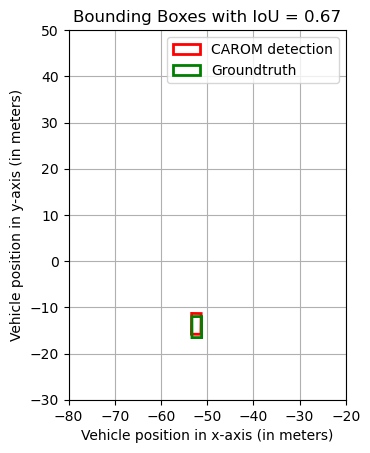

Frame Id:  84
obj1_rotation:  -93.14307985674941
obj2_rotation:  -89.8385009765625
IoU: 0.705702703212411


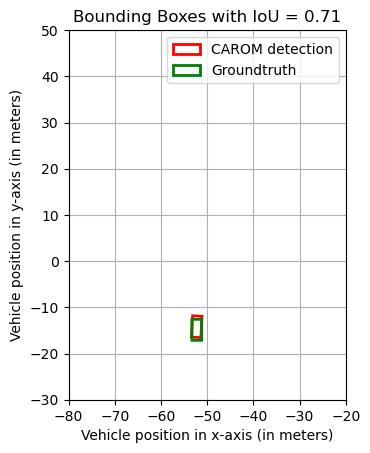

Frame Id:  85
obj1_rotation:  -90.46901298536524
obj2_rotation:  -89.8381805419922
IoU: 0.7447388986978811


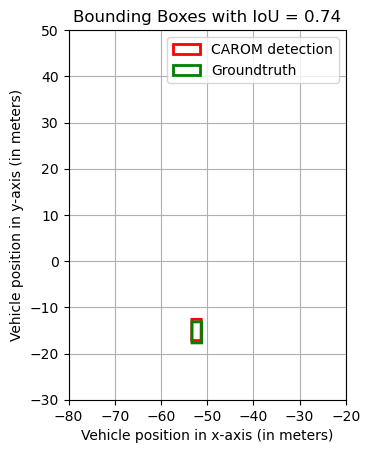

Frame Id:  86
obj1_rotation:  -92.3967519163313
obj2_rotation:  -89.83804321289064
IoU: 0.6732072706691248


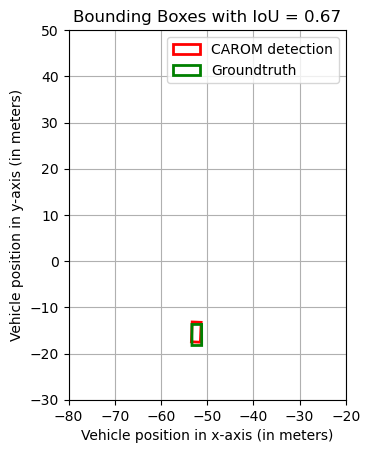

Frame Id:  87
obj1_rotation:  -90.7746844412908
obj2_rotation:  -89.83804321289064
IoU: 0.7131099481808246


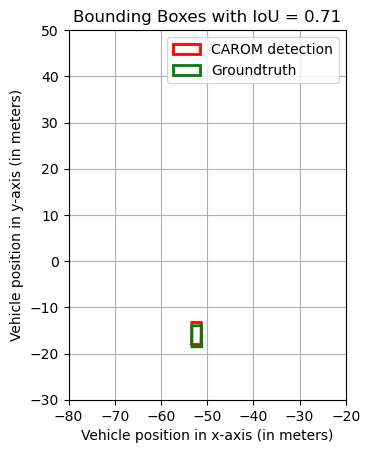

Frame Id:  88
obj1_rotation:  -90.27390180153463
obj2_rotation:  -89.84659576416016
IoU: 0.6787276682453435


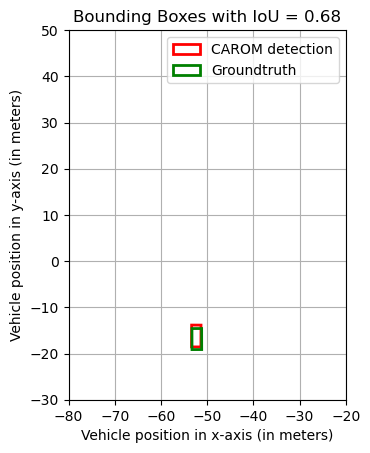

Frame Id:  89
obj1_rotation:  -90.10971088407669
obj2_rotation:  -89.81387329101565
IoU: 0.6336607329656713


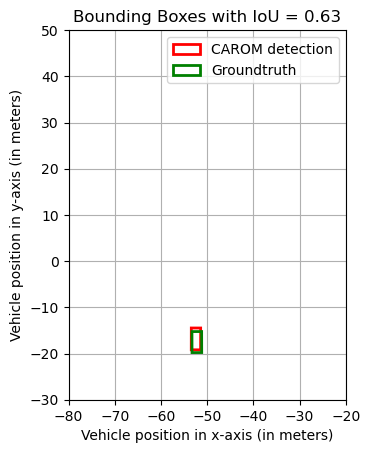

Frame Id:  90
obj1_rotation:  -88.56726975438025
obj2_rotation:  -89.82505798339847
IoU: 0.6956662441515383


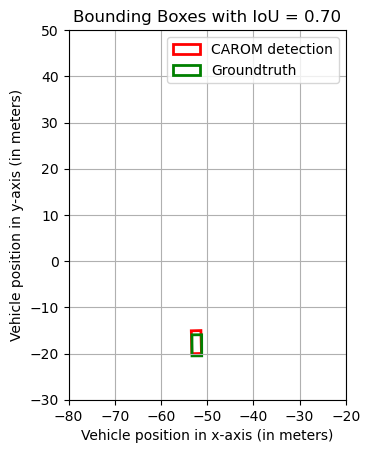

Frame Id:  91
obj1_rotation:  -88.76471003271779
obj2_rotation:  -89.84814453125001
IoU: 0.5827794267177706


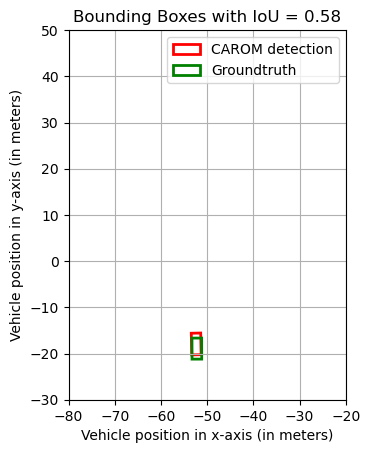

Frame Id:  92
obj1_rotation:  -88.40899378074353
obj2_rotation:  -89.8304901123047
IoU: 0.564921658613367


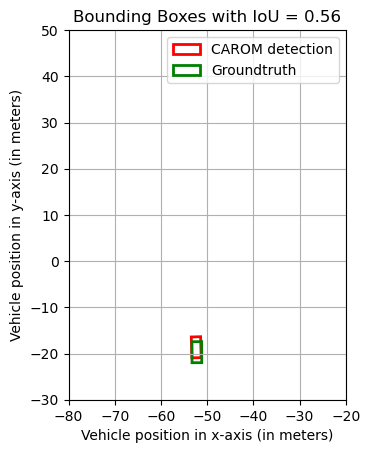

Frame Id:  93
obj1_rotation:  -87.2840479640641
obj2_rotation:  -89.82891082763673
IoU: 0.6319894039762366


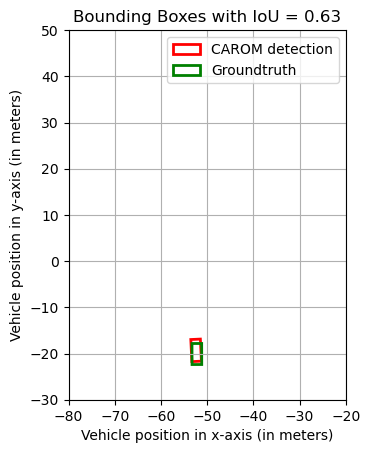

Frame Id:  94
obj1_rotation:  -88.29140524399257
obj2_rotation:  -89.82958984375001
IoU: 0.6444818441604784


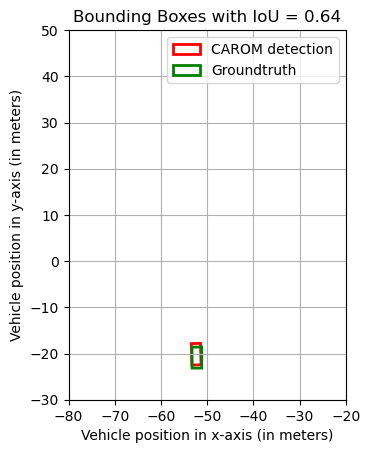

Frame Id:  95
obj1_rotation:  -87.56648311643329
obj2_rotation:  -89.83162689208984
IoU: 0.6356454865905726


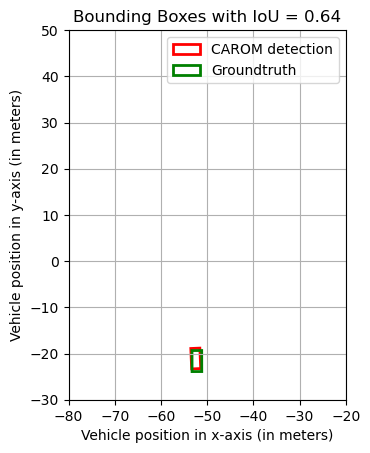

Frame Id:  96
obj1_rotation:  -88.3723566460356
obj2_rotation:  -89.83351135253908
IoU: 0.6145280341816662


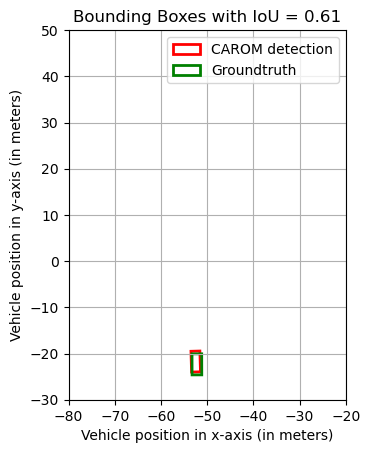

Frame Id:  97
obj1_rotation:  -89.72560836591187
obj2_rotation:  -89.83499145507814
IoU: 0.5175759405899368


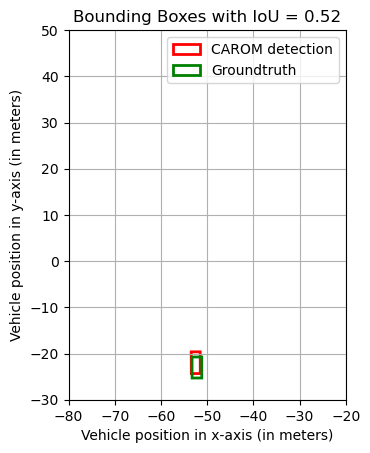

Frame Id:  98
obj1_rotation:  -89.07427469647028
obj2_rotation:  -89.83610534667969
IoU: 0.5296631800636022


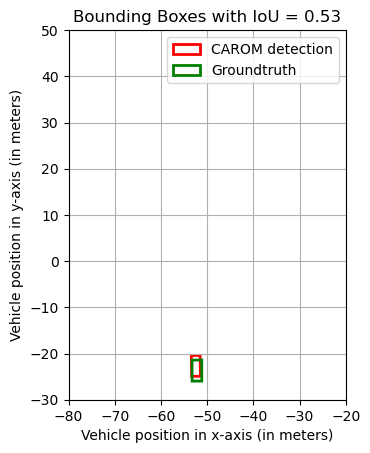

Frame Id:  99
obj1_rotation:  -87.14909025625381
obj2_rotation:  -89.8365478515625
IoU: 0.6347479479920732


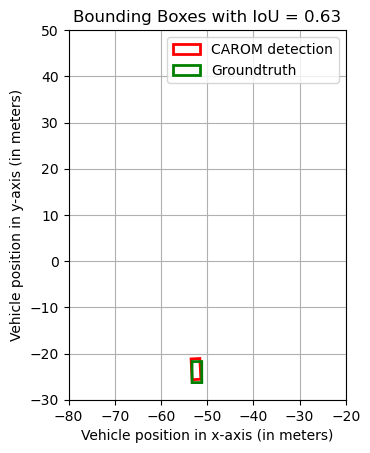

Frame Id:  100
obj1_rotation:  -89.35429879206247
obj2_rotation:  -89.83706665039062
IoU: 0.6316351290388333


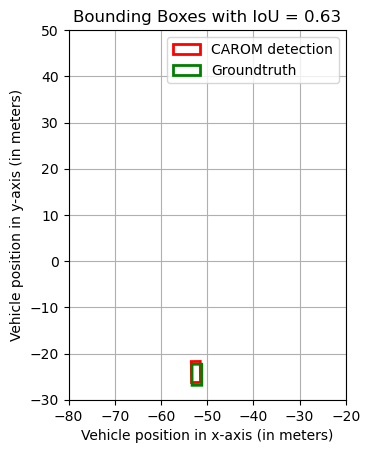

Frame Id:  101
obj1_rotation:  -89.81914097640603
obj2_rotation:  -89.83751678466797
IoU: 0.6303363726717521


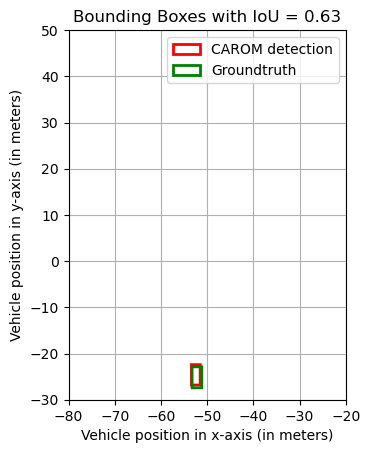

Frame Id:  102
obj1_rotation:  -90.9425978118464
obj2_rotation:  -89.83798217773439
IoU: 0.5981264250396418


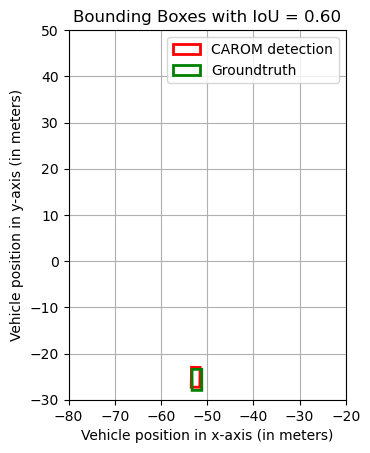

Frame Id:  103
obj1_rotation:  -91.74501526572867
obj2_rotation:  -89.84077453613283
IoU: 0.5754090696739378


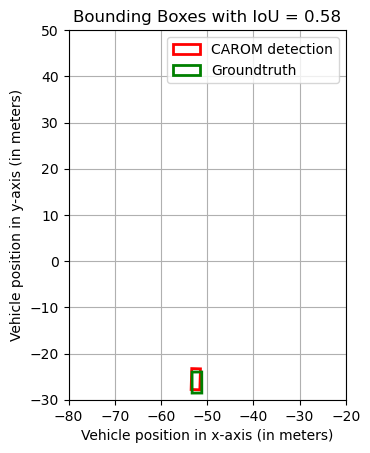

Frame Id:  104
obj1_rotation:  -90.61596450535805
obj2_rotation:  -89.84006500244142
IoU: 0.5012883251698605


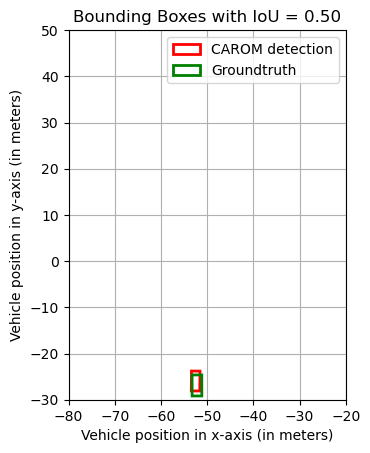

Frame Id:  105
obj1_rotation:  -90.37489980879162
obj2_rotation:  -89.8623046875
IoU: 0.5676047416949586


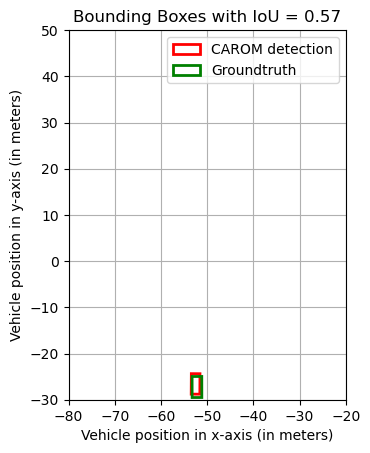

Frame Id:  106
obj1_rotation:  -89.34472286684611
obj2_rotation:  -89.87210083007812
IoU: 0.5987144368957209


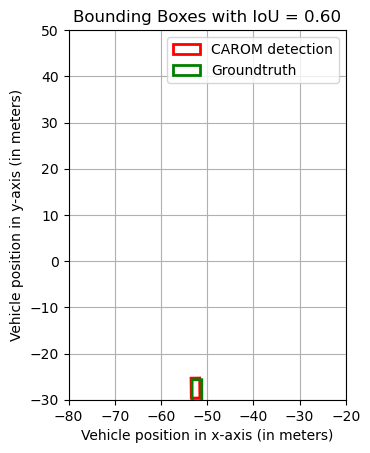

Frame Id:  107
obj1_rotation:  -88.33313769982136
obj2_rotation:  -89.88394927978516
IoU: 0.6186821774918189


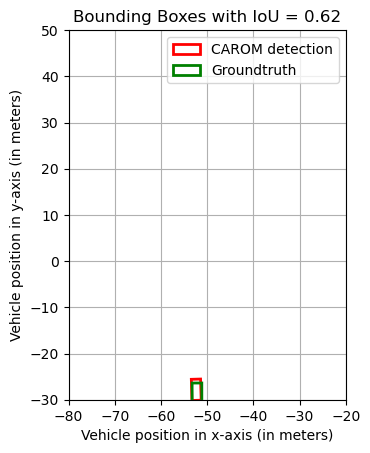

Frame Id:  108
obj1_rotation:  -88.16279278192125
obj2_rotation:  -89.8599395751953
IoU: 0.648094032238424


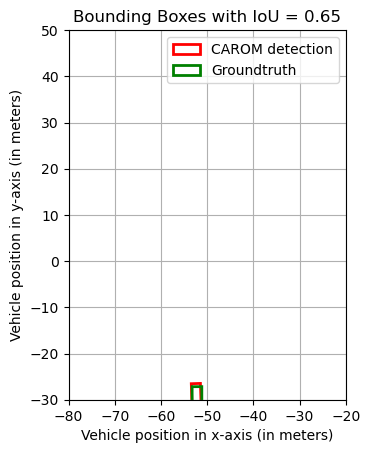

Frame Id:  109
obj1_rotation:  -89.32111090288537
obj2_rotation:  -89.8501739501953
IoU: 0.5093620854842849


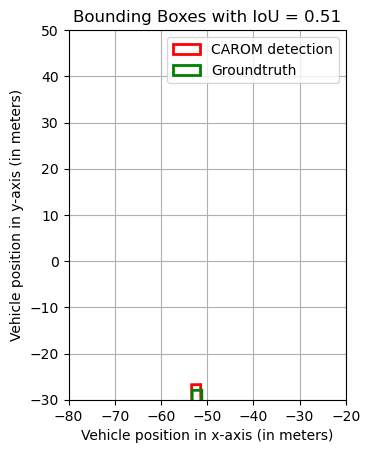

Frame Id:  110
obj1_rotation:  -86.46312069753108
obj2_rotation:  -89.8474349975586
IoU: 0.6089900758924038


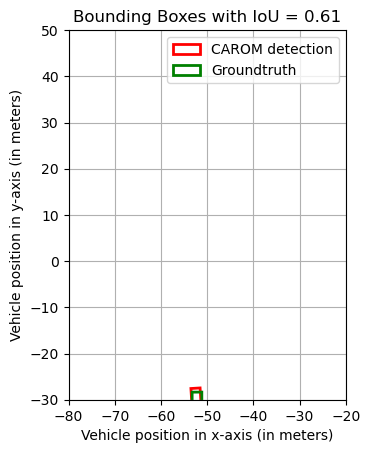

Frame Id:  111
obj1_rotation:  -89.62026635834275
obj2_rotation:  -89.84394073486328
IoU: 0.6069692103481403


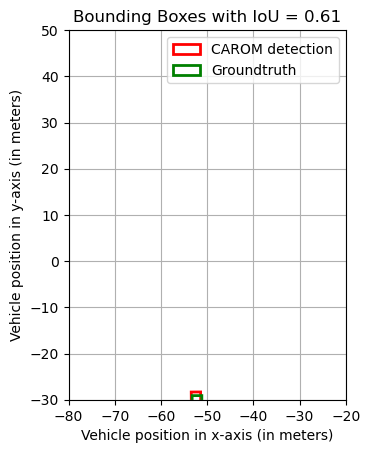

Frame Id:  112
obj1_rotation:  -88.0592334537255
obj2_rotation:  -89.84176635742188
IoU: 0.593134809882349


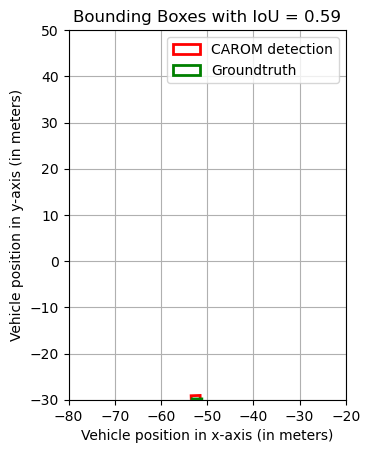

Frame Id:  113
obj1_rotation:  -89.16385945762417
obj2_rotation:  -89.8403549194336
IoU: 0.5900914003129285


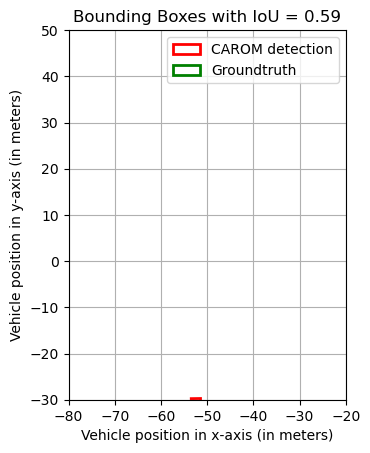

Frame Id:  114
obj1_rotation:  -88.2138484459671
obj2_rotation:  -89.83941650390624
IoU: 0.5887442212602182


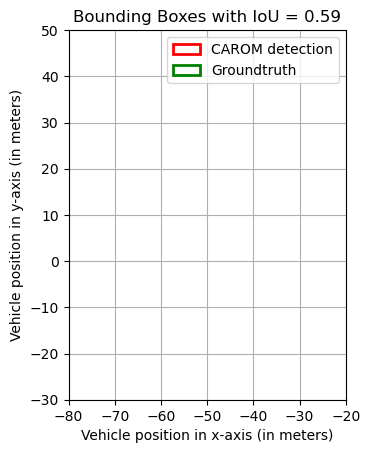

Frame Id:  115
obj1_rotation:  -87.05985383474759
obj2_rotation:  -89.83868408203125
IoU: 0.49410333010904595


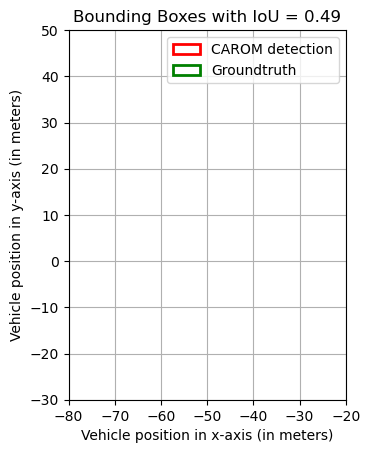

Frame Id:  116
obj1_rotation:  -87.69074474800333
obj2_rotation:  -89.83824920654298
IoU: 0.600270064199814


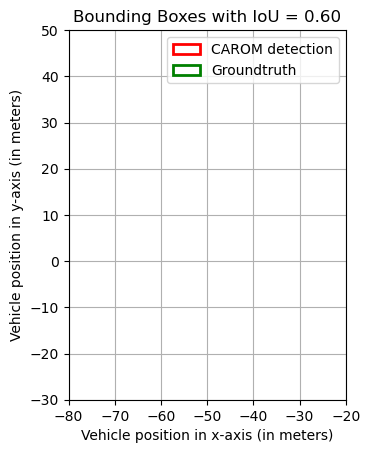

Frame Id:  117
obj1_rotation:  -86.39512616434361
obj2_rotation:  -89.83781433105467
IoU: 0.6412857701390754


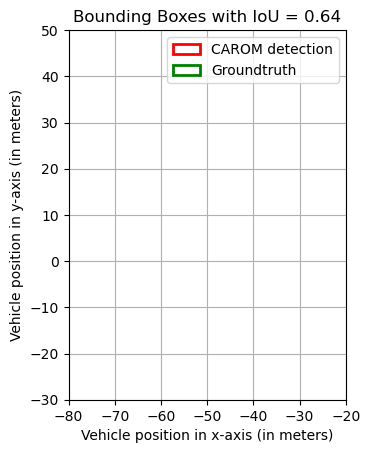

Frame Id:  118
obj1_rotation:  -86.30428464838243
obj2_rotation:  -89.83766174316406
IoU: 0.6528498971772112


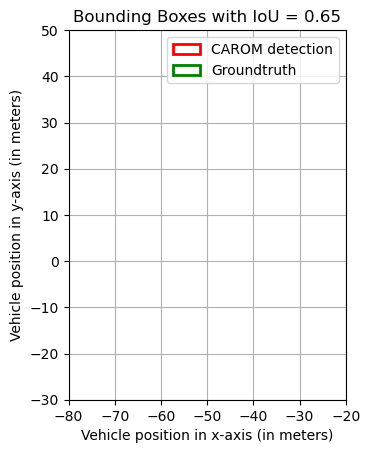

Frame Id:  119
obj1_rotation:  -88.67047391273913
obj2_rotation:  -89.83824157714845
IoU: 0.6623118868594254


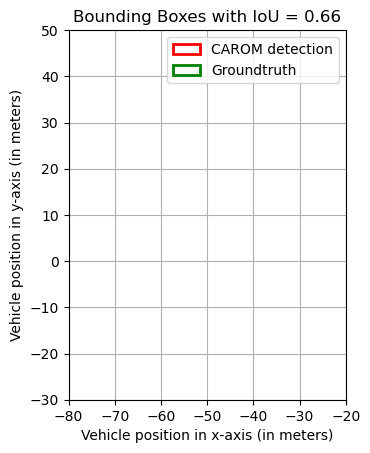

Frame Id:  120
obj1_rotation:  -89.69771387334154
obj2_rotation:  -89.83467864990234
IoU: 0.5239634150464938


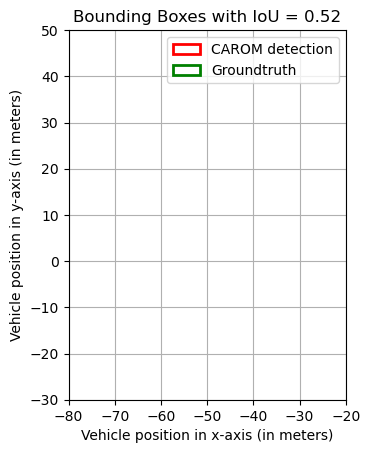

Frame Id:  121
obj1_rotation:  -87.97135623986414
obj2_rotation:  -89.82650756835938
IoU: 0.6079402781758452


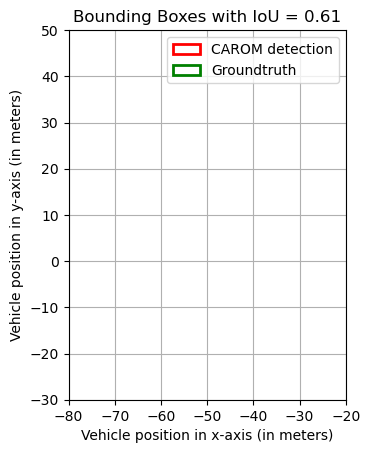

Frame Id:  122
obj1_rotation:  -88.51583159974085
obj2_rotation:  -89.83433532714844
IoU: 0.5853311219807322


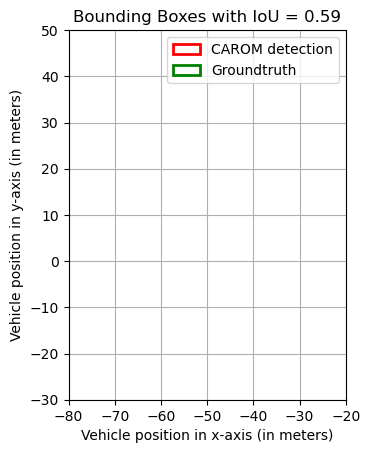

Frame Id:  123
obj1_rotation:  -87.18944984405941
obj2_rotation:  -89.8211135864258
IoU: 0.563534244008028


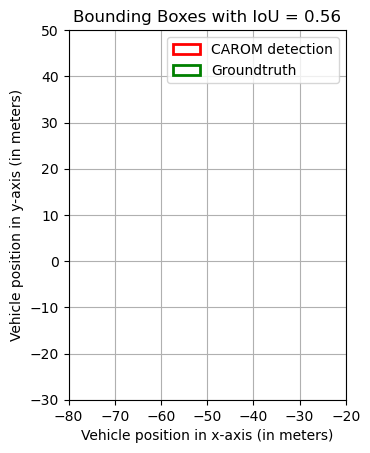

Frame Id:  124
obj1_rotation:  -89.21780429168894
obj2_rotation:  -89.84449768066405
IoU: 0.6023241093218429


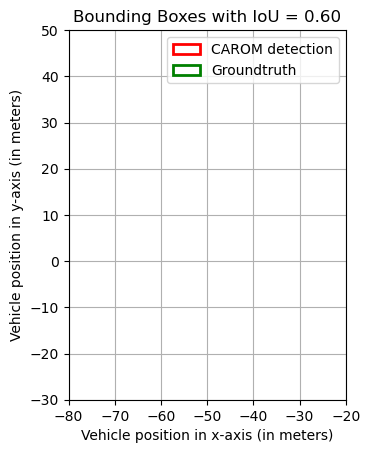

Frame Id:  125
obj1_rotation:  -89.35152573525944
obj2_rotation:  -89.84733581542969
IoU: 0.42549203343825387


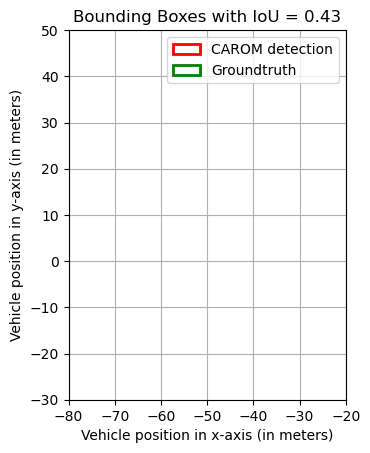

Frame Id:  126
obj1_rotation:  -88.64179394841425
obj2_rotation:  -89.8467483520508
IoU: 0.5141447159091118


Frame Id:  127
obj1_rotation:  -88.62653530580843
obj2_rotation:  -89.84457397460939
IoU: 0.5082510382056824


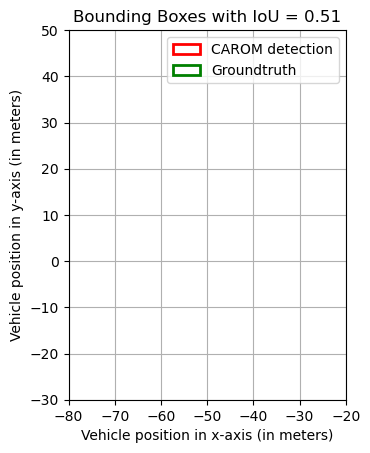

Frame Id:  128
obj1_rotation:  -88.42408849880925
obj2_rotation:  -89.84227752685548
IoU: 0.5684338086403438


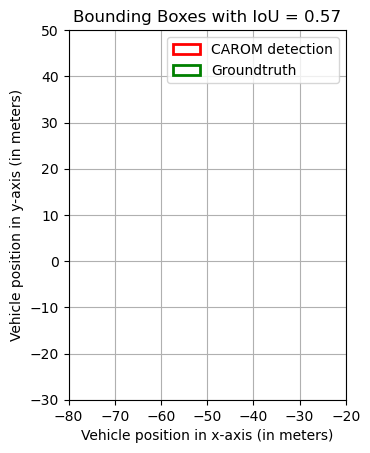

Frame Id:  129
obj1_rotation:  -87.50023711167333
obj2_rotation:  -89.84014129638672
IoU: 0.5940983664928299


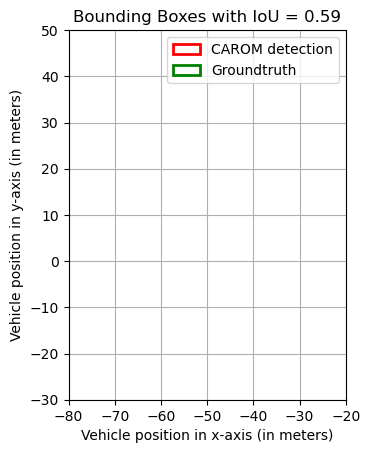

Frame Id:  130
obj1_rotation:  -88.18242274559587
obj2_rotation:  -89.83798217773438
IoU: 0.5616225826758624


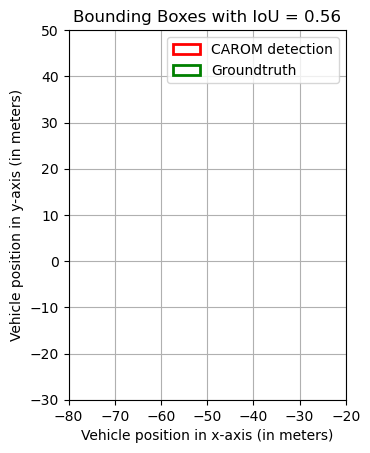

Frame Id:  131
obj1_rotation:  -88.13481632708088
obj2_rotation:  -89.8362274169922
IoU: 0.47934782874823945


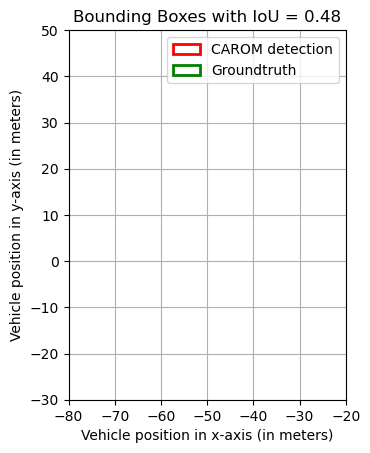

Frame Id:  132
obj1_rotation:  -86.49999005867083
obj2_rotation:  -89.83589172363281
IoU: 0.522191166238839


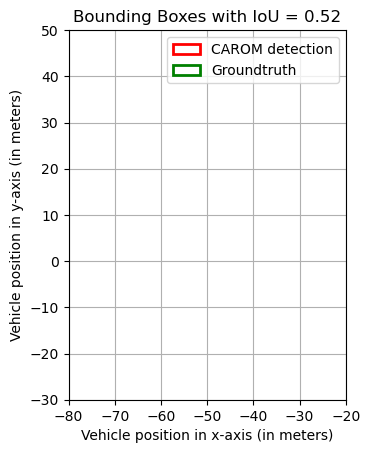

Frame Id:  133
obj1_rotation:  -87.54994039826352
obj2_rotation:  -89.83562469482423
IoU: 0.5768035382072579


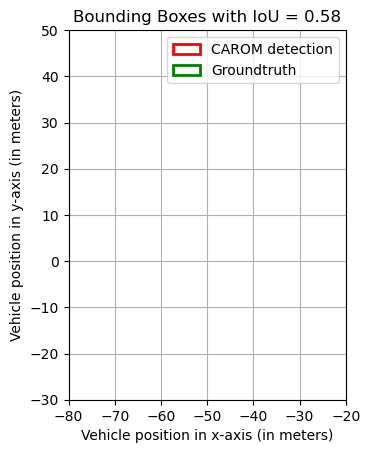

Frame Id:  134
obj1_rotation:  -85.00637112116159
obj2_rotation:  -89.83548736572266
IoU: 0.7034027681868934


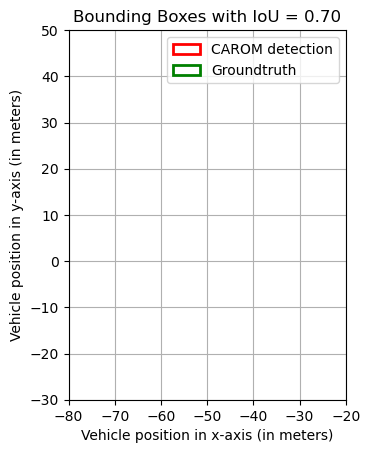

Frame Id:  135
obj1_rotation:  -88.77554954293059
obj2_rotation:  -89.834716796875
IoU: 0.6211687479963597


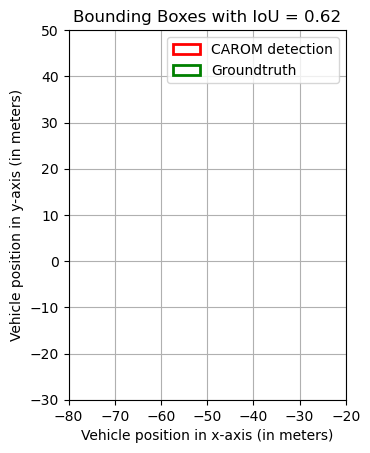

Frame Id:  136
obj1_rotation:  -88.50001971181229
obj2_rotation:  -89.83067321777344
IoU: 0.5544996224519254


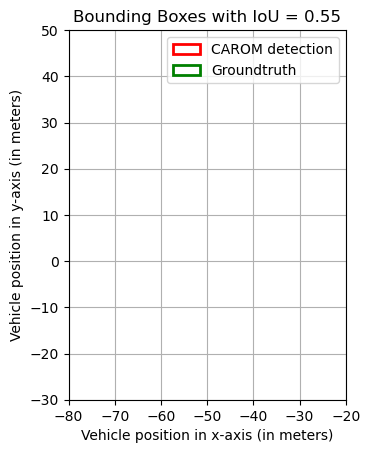

Frame Id:  137
obj1_rotation:  -87.12896851895894
obj2_rotation:  -89.82997131347656
IoU: 0.7199645219816222


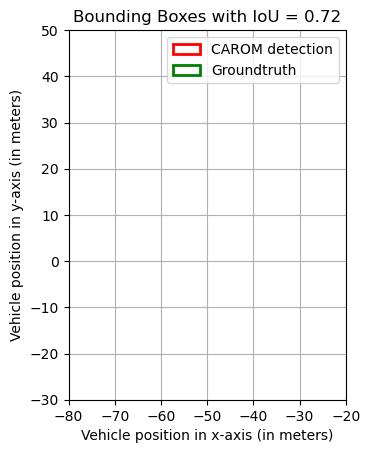

Frame Id:  138
obj1_rotation:  -88.09785817348194
obj2_rotation:  -89.84055328369142
IoU: 0.7331022519477807


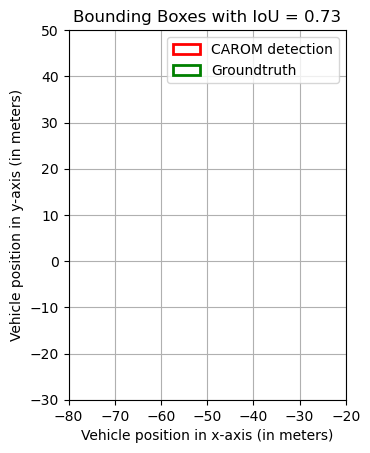

Frame Id:  139
obj1_rotation:  -89.86319569655261
obj2_rotation:  -89.84098052978518
IoU: 0.5830310256183383


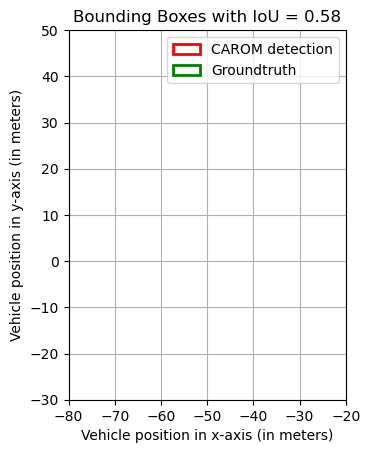

Frame Id:  140
obj1_rotation:  -88.34393622889914
obj2_rotation:  -89.84143066406251
IoU: 0.7783362710631588


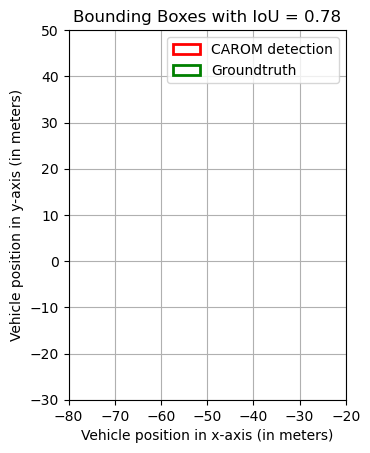

Frame Id:  141
obj1_rotation:  -86.31302046033089
obj2_rotation:  -89.84185791015626
IoU: 0.8759692951338401


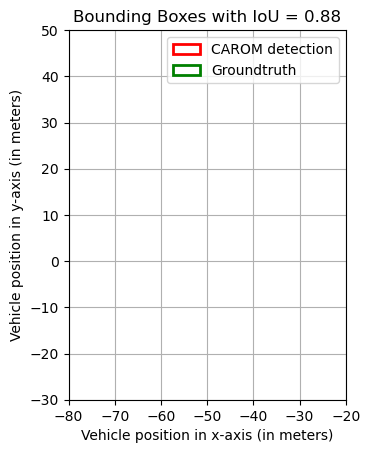

Frame Id:  142
obj1_rotation:  -86.88479608632016
obj2_rotation:  -89.8244857788086
IoU: 0.8163029372991322


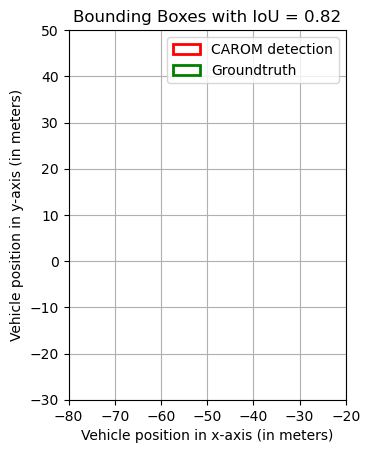

Frame Id:  143
obj1_rotation:  -87.15792169085063
obj2_rotation:  -89.77386474609376
IoU: 0.8290936962858076


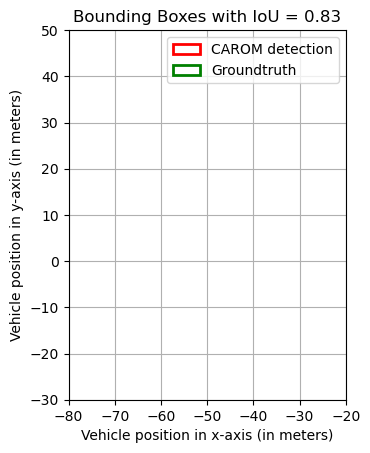

Mean of IOU:  0.4040934146863518


In [29]:
def plot_boxes(box1, box2, iou):
    fig, ax = plt.subplots()
    
    # Convert shapely Polygons to matplotlib Polygons for visualization
    mpl_box1 = MplPolygon(list(box1.exterior.coords), edgecolor='red', facecolor='none', linewidth=2, label='CAROM detection')
    mpl_box2 = MplPolygon(list(box2.exterior.coords), edgecolor='green', facecolor='none', linewidth=2, label='Groundtruth')

    ax.add_patch(mpl_box1)
    ax.add_patch(mpl_box2)

    # Plot the boxes
    ax.set_xlim(-80, -20)
    ax.set_ylim(-30, 50)
    ax.set_aspect('equal', 'box')
    plt.legend()
    plt.title(f"Bounding Boxes with IoU = {iou:.2f}")
    plt.xlabel("Vehicle position in x-axis (in meters)")
    plt.ylabel("Vehicle position in y-axis (in meters)")
    plt.grid(True)
    plt.show()

# Example parameters for two rotated boxes
IOUs = []
for frame_id in range(len(filtered_merged_df)):
    print("Frame Id: ", frame_id)
    obj1_rotation = euler_from_quaternion(filtered_merged_df.iloc[frame_id, 3], filtered_merged_df.iloc[frame_id, 4], filtered_merged_df.iloc[frame_id, 5], filtered_merged_df.iloc[frame_id, 6])
    yaw_tf = euler_from_quaternion(filtered_tf_df.iloc[frame_id, 3], filtered_tf_df.iloc[frame_id, 4], filtered_tf_df.iloc[frame_id, 5], filtered_tf_df.iloc[frame_id, 6])
    print("obj1_rotation: ", np.rad2deg(obj1_rotation)+np.rad2deg(yaw_tf))
    center_x1, center_y1, width1, height1, angle1 = transformed_position_df.iloc[frame_id, 0], transformed_position_df.iloc[frame_id, 1],\
                            filtered_merged_df.iloc[frame_id, 7], filtered_merged_df.iloc[frame_id, 8], np.rad2deg(obj1_rotation)+np.rad2deg(yaw_tf)
    obj2_rotation = euler_from_quaternion(filtered_groundtruth_df.iloc[frame_id, 13], filtered_groundtruth_df.iloc[frame_id, 14], filtered_groundtruth_df.iloc[frame_id, 15], filtered_groundtruth_df.iloc[frame_id, 16])
    print("obj2_rotation: ", np.rad2deg(obj2_rotation))
    center_x2, center_y2, width2, height2, angle2 = filtered_groundtruth_df.iloc[frame_id, 10], filtered_groundtruth_df.iloc[frame_id, 11],\
                            filtered_groundtruth_df.iloc[frame_id, 17], filtered_groundtruth_df.iloc[frame_id, 18], np.rad2deg(obj2_rotation)
    
    # Create the rotated boxes
    box1 = create_rotated_box(center_x1, center_y1, width1, height1, angle1)
    box2 = create_rotated_box(center_x2, center_y2, width2, height2, angle2)

    # Calculate IoU
    iou = calculate_iou(box1, box2)
    print("IoU:", iou)

    # Visualize the boxes
    plot_boxes(box1, box2, iou)
    
    # Calculate IoU
    iou = calculate_iou(box1, box2)
    IOUs.append(iou)
    #print("IoU:", iou)

    # Visualize the boxes
    #plot_boxes(box1, box2, iou)

print("Mean of IOU: ", np.sum(IOUs)/np.count_nonzero(IOUs))

In [37]:
def transform_map_frame_to_baselink(x, y, x_tf, y_tf, yaw_angle):
    # to transform the points from the base_link to map frame
    # transform is done for comparison with ground truth points which is in map frame
    yaw_angle = np.deg2rad(yaw_angle)
    x_ = x*math.cos(yaw_angle) - y*math.sin(yaw_angle) + x_tf # x-axis translation between map frame and base_link
    y_ = x*math.sin(yaw_angle) + y*math.cos(yaw_angle) + y_tf # y-axis translation between map frame and base_link
    return x_, y_

In [54]:
columns=["transformed_groundtruth_px", "transformed_groundtruth_py"]
transformed_groundtruth_position_df = pd.DataFrame(columns=columns)
for i in range(len(filtered_groundtruth_df)):
    yaw_tf = euler_from_quaternion(filtered_tf_df.iloc[i, 3], filtered_tf_df.iloc[i, 4], filtered_tf_df.iloc[i, 5], filtered_tf_df.iloc[i, 6])
    transformed_px, transformed_py = \
                transform_map_frame_to_baselink(filtered_groundtruth_df.iloc[i, 0], filtered_groundtruth_df.iloc[i, 1],\
                                                                        -filtered_tf_df.iloc[i, 0], filtered_tf_df.iloc[i, 1], np.rad2deg(yaw_tf)+180)
    transformed_position_dict = dict(zip(columns, [transformed_px, transformed_py]))
    transformed_groundtruth_position_df = transformed_groundtruth_position_df.append(transformed_position_dict, ignore_index=True)

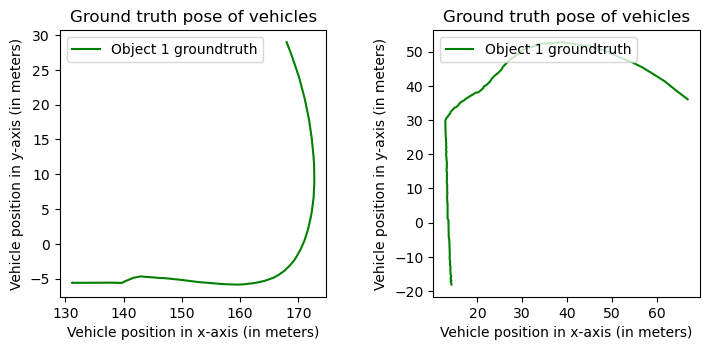

In [55]:
fig = plt.figure() 
fig.set_figwidth(8)
fig.set_figheight(8)
fig.tight_layout(pad=55.0)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = fig.add_subplot(221) 
plt.xlabel("Vehicle position in x-axis (in meters)")
plt.ylabel("Vehicle position in y-axis (in meters)")
plt.title('Ground truth pose of vehicles')
plt.plot(transformed_groundtruth_position_df.iloc[:, 0], transformed_groundtruth_position_df.iloc[:, 1], label='Object 1 groundtruth', color='green')
#plt.plot(filtered_groundtruth_df.iloc[:, 10], filtered_groundtruth_df.iloc[:, 11], label='Object 2 groundtruth', color='blue')
plt.legend(loc='upper left')

ax = fig.add_subplot(222) 
plt.xlabel("Vehicle position in x-axis (in meters)")
plt.ylabel("Vehicle position in y-axis (in meters)")
plt.title('Ground truth pose of vehicles')
plt.plot(filtered_merged_df.iloc[:, 0], filtered_merged_df.iloc[:, 1], label='Object 1 groundtruth', color='green')
#plt.plot(merged_df.iloc[:, 10], merged_df.iloc[:, 11], label='Object 2 groundtruth', color='blue')
plt.legend(loc='upper left')